In [4]:
import scanpy as sc
import tcri
import scirpy

import scanpy as sc
import tcri
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
import grimoire as spell
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import glob
import os
adatas = []
sample_name = []

def read_trb_sequence(tenx_vdj_output):
    df_contig     = pd.read_csv(tenx_vdj_output)
    cells = collections.defaultdict(list)
    for bc, chain, nt, cid in zip(df_contig["barcode"],df_contig["chain"],df_contig["cdr3"],df_contig["raw_consensus_id"]):
        if chain == "TRB":
            num = cid.split("_")[-1]
            cells[bc].append(nt+"_"+num)
    cells_1stcontig = dict()
    for c, seqs in cells.items():
        for x in seqs:
            if x.split("_")[-1] == "1":
                break
        cells_1stcontig[c] = x.replace("_1","")
    return cells_1stcontig


mats = glob.glob("/Users/ceglian/Downloads/smith_data/*/*.mtx.gz")
for x in mats:
    print(x)
    p = x.split("/")[-2].split("_")[0]
    site = x.split("/")[-2].split("_")[1]
    print(p, site)
    sample_name.append("{}_{}".format(p,site))
    dirx, f = os.path.split(x)
    vdj_path = os.path.join(dirx+".vdj","filtered_contig_annotations.csv")
    adata = sc.read_10x_mtx(dirx)
    contigs = read_trb_sequence(vdj_path)
    ct = []
    for x in adata.obs.index:
        if x in contigs:
            ct.append(contigs[x])
        else:
            ct.append("Other")
    adata.obs["trb"] = ct
    adata.var_names_make_unique()
    adatas.append(adata)

In [ ]:
# sample_name = dict()
# for x,a in zip(mats,adatas):
#     sample = x.split("/")[-2]
#     sample_name[sample] = a
# adatas = []
# samples = []
# for x,y in sample_name.items():
#     adatas.append(y)
#     samples.append(x)
# pat = []
# for x in adata.obs["sample"]:
#     p = x.split("_")[0]
#     pat.append(p)
# adata.obs["patient"] = pat

pat = []
for x in adata.obs["sample"]:
    p = x.split("_")[0]
    pat.append(p)
adata.obs["batch"] = pat

pat = """MD01-005
MD01-004
MD043-008
MD043-011
MD01-019
MD043-003
MD043-006
MD01-024
MD01-010
NY016-007
NY016-014
NY016-016
NY016-015
NY016-021
NY016-022
NY016-025""".splitlines()
resp = """MPR 
non-MPR
MPR
non-MPR
non-MPR
MPR
non-MPR
non-MPR
MPR
non-MPR
non-MPR
MPR
non-MPR
non-MPR
MPR
MPR""".splitlines()
resp = [x.strip() for x in resp]
resp_d = dict(zip(pat,resp))
ct = []
for x in adata.obs["batch"]:
    ct.append(resp_d[x])
adata.obs["response"] = ct

adata = adatas[0].concatenate(adatas[1:],batch_categories=samples,batch_key="sample")
adata.write("smith_new.h5ad")

In [5]:
adata = sc.read("smith_new.h5ad")

adata = adata[adata.obs["trb"]!=""]
adata = adata[adata.obs["trb"]!="nan"]
adata = adata[adata.obs["trb"]!="Other"]
adata

valid = """NY016-025
MD01-005
MD043-003
MD043-008
MD01-004
NY016-007
MD043-011
MD01-019
NY016-014""".splitlines()
adata = adata[adata.obs["batch"].isin(valid)]
len(set(adata.obs["batch"]))

import grimoire as grm
markers = dict()
markers["CD8 T"] = ["CD8A","CD8B","CD3D","CD3E","CD3G"]
markers["CD4 T"] = ["CD4","CD3D","CD3E","CD3G"]
grm.tl.classify(adata,markers,temperature=0.001)
adata = adata[adata.obs['phenotype'] == "CD8 T"]
tcri.pp.gene_entropy(adata, batch_key="sample")

9

In [10]:
import collections
genes = """GZMK	Effector(I)
DKK3	Effector(I)
CST7	Effector(I)
YPEL5	Effector(I)
CXCR5	Effector(I)
COTL1	Effector(I)
YBX3	Effector(I)
LDHA	Effector(I)
ITGA5	Effector(I)
CXCR3	Effector(I)
LITAF	Effector(I)
IGFBP4	Effector(I)
RGCC	Effector(I)
ZNF331	Effector(I)
ATP1B3	Effector(I)
TRMO	Effector(I)
SH2D1A	Effector(I)
TRAT1	Effector(I)
CLDND1	Effector(I)
GPR183	Effector(I)
TC2N	Effector(I)
TSPYL2	Effector(I)
CD5	Effector(I)
SDCBP	Effector(I)
CRTAM	Effector(I)
CYTH3	Effector(I)
MARCKSL1	Effector(I)
NR4A3	Effector(I)
LYST	Effector(I)
RASA3	Effector(I)
HNRNPLL	Effector(I)
KLF3	Effector(I)
RILPL2	Effector(I)
EOMES	Effector(I)
ENC1	Effector(I)
HLA-DRA	Effector(II)
HLA-DQA1	Effector(II)
GZMK	Effector(II)
HLA-DRB1	Effector(II)
HLA-DQB1	Effector(II)
CD74	Effector(II)
TNFRSF9	Effector(II)
HLA-DRB5	Effector(II)
VCAM1	Effector(II)
HLA-DPA1	Effector(II)
NKG7	Effector(II)
CST7	Effector(II)
HLA-DPB1	Effector(II)
DUSP4	Effector(II)
CXCL13	Effector(II)
HAVCR2	Effector(II)
GZMA	Effector(II)
AC243829.4	Effector(II)
CCL5	Effector(II)
ADGRG1	Effector(II)
PDCD1	Effector(II)
NAB1	Effector(II)
LYST	Effector(II)
GZMH	Effector(II)
CD200R1	Effector(II)
FABP5	Effector(II)
COTL1	Effector(II)
SLA2	Effector(II)
HNRNPLL	Effector(II)
ITM2A	Effector(II)
CD27	Effector(II)
HMGB2	Effector(II)
LAG3	Effector(II)
TRAT1	Effector(II)
CRTAM	Effector(II)
CD8B	Effector(II)
PRF1	Effector(II)
APOBEC3G	Effector(II)
LMNB1	Effector(II)
ENC1	Effector(II)
CXCL13	TRM(II)
LINC01871	TRM(II)
RBPJ	TRM(II)
CTLA4	TRM(II)
ALOX5AP	TRM(II)
GZMB	TRM(II)
PDCD1	TRM(II)
TNS3	TRM(II)
HLA-DQA1	TRM(II)
DUSP4	TRM(II)
RGS1	TRM(II)
CLECL1	TRM(II)
CD7	TRM(II)
TSPAN13	TRM(II)
ITGAE	TRM(II)
HLA-DRB1	TRM(II)
HLA-DRA	TRM(II)
GZMH	TRM(II)
SLC1A4	TRM(II)
SAMSN1	TRM(II)
GALNT2	TRM(II)
KRT86	TRM(II)
LINC02446	TRM(II)
ADGRG1	TRM(II)
CXCR6	TRM(II)
NR3C1	TRM(II)
ENTPD1	TRM(II)
NAB1	TRM(II)
SLA2	TRM(II)
JAML	TRM(II)
SLC7A5	TRM(II)
ITGB1	TRM(II)
LDLRAD4	TRM(II)
HLA-DQB1	TRM(II)
HLA-DRB5	TRM(II)
AKAP5	TRM(II)
ANKRD28	TRM(II)
POLR1E	TRM(II)
TNFRSF9	TRM(II)
CYTOR	TRM(II)
ZEB2	TRM(II)
SNX9	TRM(II)
CHN1	TRM(II)
VCAM1	TRM(II)
MIR155HG	TRM(II)
MYO1E	TRM(II)
NBL1	TRM(II)
GPR25	TRM(II)
HAVCR2	TRM(II)
KLRD1	TRM(II)
RUNX2	TRM(II)
SYTL2	TRM(II)
MAST4	TRM(II)
CARS	TRM(II)
LAYN	TRM(II)
ACP5	TRM(II)
BCL2L11	TRM(II)
SPRY1	TRM(II)
IL7R	TRM(I)
RGCC	TRM(I)
LDLRAD4	TRM(I)
TSC22D3	TRM(I)
IGFBP3	TRM(I)
PGK1	TRM(I)
ANKRD28	TRM(I)
SMIM3	TRM(I)
NBL1	TRM(I)
CRIP1	TRM(I)
CXCR3	TRM(I)
AHNAK	TRM(I)
IVNS1ABP	TRM(I)
PTGER4	TRM(I)
GPR183	TRM(I)
PRNP	TRM(I)
S100A11	TRM(I)
GLIPR1	TRM(I)
ARL4A	TRM(I)
BIK	TRM(I)
LGALS3	TRM(I)
KLRC1	TRM(I)
AUTS2	TRM(I)
GFPT2	TRM(I)
CCL5	TRM(IV)
TNFSF9	TRM(IV)
GZMA	TRM(IV)
TXNIP	TRM(IV)
TSC22D1	TRM(IV)
CCL4L2	TRM(IV)
CD74	TRM(IV)
CD52	TRM(IV)
CCL4	TRM(IV)
GADD45G	TRM(IV)
GZMK	TRM(IV)
IFNG	TRM(IV)
AC025164.1	TRM(IV)
ARRDC3	TRM(IV)
CD27	TRM(IV)
GBP5	TRM(IV)
S100A4	TRM(IV)
SAMD3	TRM(IV)
SLFN5	TRM(IV)
TAGAP	TRM(IV)
TRAC	TRM(IV)
KIAA1551	TRM(IV)
GIMAP7	TRM(IV)
LINC00649	TRM(IV)
PYHIN1	TRM(IV)
RCSD1	TRM(IV)
NABP1	TRM(IV)
JAML	TRM(IV)
CCL4L2	TRM(V)
CCL4	TRM(V)
IFNG	TRM(V)
XCL2	TRM(V)
TNFSF9	TRM(V)
CCL3	TRM(V)
FABP5	TRM(V)
CXCL13	TRM(V)
HMOX1	TRM(V)
PRRG4	TRM(V)
MS4A6A	TRM(V)
HLA-DPA1	TRM(V)
LINC01480	TRM(V)
CCL5	TRM(V)
H3F3B	TRM(V)
CD200	TRM(V)
ACTRT3	TRM(V)
HLA-DQA1	TRM(V)
NKG7	TRM(V)
GZMA	TRM(V)
CCL3L1	TRM(V)
VCAM1	TRM(V)
HLA-DRA	TRM(V)
FTL	TRM(V)
CDKN2C	TRM(V)
XCL1	TRM(V)
TSC22D1	TRM(V)
EDARADD	TRM(V)
DYNLL1	TRM(V)
LYST	TRM(V)
CD27	TRM(V)
HLA-DRB1	TRM(V)
CD74	TRM(V)
TAGAP	TRM(V)
FAM3C	TRM(V)
GEM	TRM(V)
TNFSF4	TRM(V)
VSIR	TRM(V)
PPP1R2	TRM(V)
HLA-DPB1	TRM(V)
HMGB2	TRM(V)
SRSF7	TRM(V)
TNFRSF9	TRM(V)
CLEC2B	TRM(V)
BPGM	TRM(V)
GBP5	TRM(V)
CRTAM	TRM(V)
MIR155HG	TRM(V)
IL2	TRM(V)
GZMH	TRM(V)
LRRN3	TRM(V)
KCNK5	TRM(V)
HAVCR2	TRM(V)
DUSP4	TRM(V)
CDC42EP3	TRM(V)
TXNIP	TRM(V)
RASL11A	TRM(V)
NKRF	TRM(V)
PTTG1	TRM(V)
LGALS1	TRM(V)
ARRDC3	TRM(V)
ULBP2	TRM(V)
CGAS	TRM(V)
HLA-DQB1	TRM(V)
ICOS	TRM(V)
SDCBP	TRM(V)
TP53INP1	TRM(V)
CARD16	TRM(V)
AC243829.4	TRM(V)
CTNNAL1	TRM(V)
NFKBIE	TRM(V)
MIR181A1HG	TRM(V)
NMB	TRM(V)
HLA-DRB5	TRM(V)
PYHIN1	TRM(V)
SMC4	TRM(V)
CENPF	TRM(V)
CITED2	TRM(V)
RASGEF1B	TRM(V)
PLIN2	TRM(V)
THEMIS	TRM(V)
SLAMF7	TRM(V)
CD200R1	TRM(V)
IPCEF1	TRM(V)
CTSC	TRM(V)
PRDM1	TRM(V)
FOXN2	TRM(V)
CD70	TRM(V)
GBP3	TRM(V)
RGS1	TRM(V)
GLA	TRM(V)
TIFA	TRM(V)
EOMES	TRM(V)
TOX	TRM(V)
SLF1	TRM(V)
TNFSF14	TRM(V)
TNFAIP8	TRM(V)
FASLG	TRM(V)
PECAM1	TRM(V)
BCL2A1	TRM(V)
AC243960.1	TRM(V)
DDAH2	TRM(V)
IL10	TRM(V)
MBNL2	TRM(V)
NAF1	TRM(V)
SELL	CD4CD8(I)
TNFRSF4	CD4CD8(I)
SESN3	CD4CD8(I)
CD40LG	CD4CD8(I)
NR3C1	CD4CD8(I)
CH25H	CD4CD8(I)
BATF	CD4CD8(I)
IL7R	CD4CD8(I)
CCR7	CD4CD8(I)
FAAH2	CD4CD8(I)
CCR4	CD4CD8(I)
ITK	CD4CD8(I)
NMB	CD4CD8(I)
CRYBG1	CD4CD8(I)
MAF	CD4CD8(I)
TNFSF8	CD4CD8(I)
CD4	CD4CD8(I)
PLIN2	CD4CD8(I)
TNFAIP8	CD4CD8(I)
PTPN13	CD4CD8(I)
PIM2	CD4CD8(I)
PASK	CD4CD8(I)
ICOS	CD4CD8(I)
TSHZ2	CD4CD8(I)
GNA15	CD4CD8(I)
SAMHD1	CD4CD8(I)
LEF1	CD4CD8(I)
TIAM1	CD4CD8(I)
CYSLTR1	CD4CD8(I)
SERINC5	CD4CD8(I)
FAS	CD4CD8(I)
SCML1	CD4CD8(I)
SESN1	CD4CD8(I)
TRABD2A	CD4CD8(I)
SRGN	CD4CD8(I)
IL6ST	CD4CD8(I)
ARID5B	CD4CD8(I)
S1PR1	CD4CD8(I)
TXNIP	CD4CD8(I)
SC5D	CD4CD8(I)
CD28	CD4CD8(I)
ICAM2	CD4CD8(I)
GPR171	CD4CD8(I)
GATA3	CD4CD8(I)
AP3M2	CD4CD8(I)
TESPA1	CD4CD8(I)
GPR183	CD4CD8(I)
SLC2A3	CD4CD8(I)
ANKRD12	CD4CD8(I)
FAM107B	CD4CD8(I)
RORA	CD4CD8(I)
SOCS1	CD4CD8(I)
LTB	CD4CD8(I)
DDIT4	CD4CD8(I)
MAL	CD4CD8(I)
RILPL2	CD4CD8(I)
RNF19A	CD4CD8(I)
SH3TC1	CD4CD8(I)
CXCL13	CD4CD8(I)
KLRC3	TRM(VI)
KIR3DL2	TRM(VI)
XCL1	TRM(VI)
LINC02446	TRM(VI)
XCL2	TRM(VI)
KIR2DL3	TRM(VI)
KIR3DL1	TRM(VI)
KRT86	TRM(VI)
KLRC2	TRM(VI)
KLRD1	TRM(VI)
AC068775.1	TRM(VI)
ZNF683	TRM(VI)
SPRY2	TRM(VI)
CD7	TRM(VI)
GPR25	TRM(VI)
PIK3R1	TRM(VI)
PABPC1	TRM(VI)
LDLRAD4	TRM(VI)
GLUL	TRM(VI)
PGK1	TRM(VI)
LINC01871	TRM(VI)
KLRC1	TRM(VI)
ATP8B4	TRM(VI)
KIR2DL4	TRM(VI)
SLA2	TRM(VI)
TGFB1	TRM(VI)
PRF1	TRM(VI)
GNLY	TRM(VI)
LITAF	TRM(VI)
HOPX	TRM(VI)
GZMB	TRM(VI)
FAM177A1	TRM(VI)
TBX21	TRM(VI)
DDIT4	TRM(VI)
IFITM2	TRM(VI)
SLC7A5	TRM(VI)
ANKRD28	TRM(VI)
CRIP1	TRM(VI)
VPS37B	TRM(VI)
IKZF2	TRM(VI)
PDE4A	TRM(VI)
ZEB2	TRM(VI)
TYROBP	TRM(VI)
PIK3AP1	TRM(VI)
NCR3	TRM(VI)
CCR7	Stem-like memory
SELL	Stem-like memory
IL7R	Stem-like memory
LEF1	Stem-like memory
PASK	Stem-like memory
KLF3	Stem-like memory
S1PR1	Stem-like memory
BACH2	Stem-like memory
GPR183	Stem-like memory
PABPC1	Stem-like memory
SESN3	Stem-like memory
LTB	Stem-like memory
NFKB1	Stem-like memory
SCML1	Stem-like memory
P2RY8	Stem-like memory
TRABD2A	Stem-like memory
ARMH1	Stem-like memory
PCSK1N	Stem-like memory
BEX2	Stem-like memory
FAAH2	Stem-like memory
PGAP1	Stem-like memory
LMO7	Stem-like memory
CMSS1	Stem-like memory
YES1	Stem-like memory
ACTN1	Stem-like memory
NELL2	Stem-like memory
ZBTB10	Stem-like memory
SC5D	Stem-like memory
ICAM2	Stem-like memory
GPCPD1	Stem-like memory
FAM177A1	Stem-like memory
TCF7	Stem-like memory
SATB1	Stem-like memory
YBX3	Stem-like memory
CXCR3	Stem-like memory
JMJD1C	Stem-like memory
AP3M2	Stem-like memory
RGCC	Stem-like memory
FAM107B	Stem-like memory
PRNP	Stem-like memory
SLC2A3	Stem-like memory
ELL2	Stem-like memory
TESPA1	Stem-like memory
TNFAIP8	Stem-like memory
TAF4B	Stem-like memory
TXK	Stem-like memory
PLAC8	Stem-like memory
RASA3	Stem-like memory
FOXP1	Stem-like memory
ABLIM1	Stem-like memory
SDCBP	Stem-like memory
TLE4	Stem-like memory
ANKRD12	Stem-like memory
ALG13	Stem-like memory
EMP3	Stem-like memory
FCMR	Stem-like memory
SAMHD1	Stem-like memory
PTGER2	Stem-like memory
LITAF	Stem-like memory
SORL1	Stem-like memory
TNFSF8	Stem-like memory
MAL	Stem-like memory
NSG1	Stem-like memory
APBA2	Stem-like memory
RIPOR2	Stem-like memory
ITGA6	Stem-like memory
NOSIP	Stem-like memory
SERINC5	Stem-like memory
FXYD7	Stem-like memory
ATM	Stem-like memory
CD28	Stem-like memory
GNLY	Effector(III)
FCGR3A	Effector(III)
NKG7	Effector(III)
KLRF1	Effector(III)
KLRG1	Effector(III)
C1orf21	Effector(III)
KLRD1	Effector(III)
SPON2	Effector(III)
KLRC3	Effector(III)
P2RY8	Effector(III)
LYAR	Effector(III)
LAIR2	Effector(III)
CST7	Effector(III)
FCRL6	Effector(III)
CD300A	Effector(III)
COL6A2	Effector(III)
AUTS2	Effector(III)
GZMH	Effector(III)
IFNGR1	Effector(III)
RASA3	Effector(III)
ITGA5	Effector(III)
GZMB	Effector(III)
SORL1	Effector(III)
PLEKHF1	Effector(III)
LITAF	Effector(III)
KLF3	Effector(III)
TBX21	Effector(III)
FLNA	Effector(III)
PLEK	Effector(III)
S1PR5	Effector(III)
PRF1	Effector(III)
S100A4	Effector(III)
SYNE1	Effector(III)
SAMD3	Effector(III)
PLAC8	Effector(III)
PRSS23	Effector(III)
AC004687.1	Effector(III)
UPP1	Effector(III)
S1PR1	Effector(III)
TYROBP	Effector(III)
ADRB2	Effector(III)
ENC1	Effector(III)
ADGRG1	Effector(III)
MT1E	TRM(III)
MT1X	TRM(III)
MT1F	TRM(III)
PDCD1	TRM(III)
CXCL13	TRM(III)
CRIP1	TRM(III)
ADGRE5	TRM(III)
AC243829.4	TRM(III)
S100A6	TRM(III)
ADGRG1	TRM(III)
GZMH	TRM(III)
CD7	TRM(III)
GZMB	TRM(III)
AKAP5	TRM(III)
SLA2	TRM(III)
S100A11	TRM(III)
CXCR6	TRM(III)
DUSP4	TRM(III)
HLA-DRB1	TRM(III)
YWHAH	TRM(III)
EMP3	TRM(III)
RBPJ	TRM(III)
ITGAE	TRM(III)
LGALS1	TRM(III)
GZMA	TRM(III)
CD8B	TRM(III)
APOBEC3G	TRM(III)
CYTOR	TRM(III)
ITGB1	TRM(III)
LAG3	TRM(III)
MIR155HG	TRM(III)
TXN	TRM(III)
MT1G	TRM(III)
ITM2C	TRM(III)
KLRB1	MAIT
CCR6	MAIT
AQP3	MAIT
IL7R	MAIT
RORA	MAIT
LTB	MAIT
IL4I1	MAIT
TLE1	MAIT
NINJ1	MAIT
RORC	MAIT
CD69	MAIT
PBX4	MAIT
NFKB1	MAIT
BLK	MAIT
PABPC1	MAIT
NCF1	MAIT
GNA15	MAIT
MAF	MAIT
FEZ1	MAIT
S100A4	MAIT
ABCA1	MAIT
CD40LG	MAIT
GCHFR	MAIT
IFNGR1	MAIT
GPR65	MAIT
AC245014.3	MAIT
SORL1	MAIT
MPZL3	MAIT
LST1	MAIT
IL18RAP	MAIT
ODF2L	MAIT
IL18R1	MAIT
SNX9	MAIT
ERN1	MAIT
GYG1	MAIT
GTF3C1	MAIT
PIM2	MAIT
SLC7A5	MAIT
LDHA	MAIT
LINC01871	MAIT
TGFB1	MAIT
SYTL2	MAIT
PRNP	MAIT
ZBTB16	MAIT
AC020916.1	MAIT
FAM177A1	MAIT
RELB	MAIT
SLC4A10	MAIT
IL27RA	MAIT
DSE	MAIT
S100A11	MAIT
MYBL1	MAIT
AHNAK	MAIT
EMP3	MAIT
LGALS3	MAIT
TC2N	MAIT
SATB1	MAIT
KMT2E-AS1	MAIT
PNP	MAIT
GFPT2	MAIT
CA2	MAIT
NCR3	MAIT
TMIGD2	MAIT
SESN1	MAIT
HPGD	MAIT
TNFRSF4	CD4CD8(II)
MAGEH1	CD4CD8(II)
CCR8	CD4CD8(II)
BATF	CD4CD8(II)
CTLA4	CD4CD8(II)
FOXP3	CD4CD8(II)
TNFRSF18	CD4CD8(II)
IL2RA	CD4CD8(II)
ICA1	CD4CD8(II)
CARD16	CD4CD8(II)
TBC1D4	CD4CD8(II)
FAAH2	CD4CD8(II)
TIGIT	CD4CD8(II)
ICOS	CD4CD8(II)
RTKN2	CD4CD8(II)
ARID5B	CD4CD8(II)
IL1R2	CD4CD8(II)
LINC01943	CD4CD8(II)
SELL	CD4CD8(II)
MIR4435-2HG	CD4CD8(II)
CCR4	CD4CD8(II)
TIAM1	CD4CD8(II)
SAMHD1	CD4CD8(II)
CCR6	CD4CD8(II)
LTB	CD4CD8(II)
TNFRSF9	CD4CD8(II)
FAS	CD4CD8(II)
PLIN2	CD4CD8(II)
CD27	CD4CD8(II)
SESN3	CD4CD8(II)
PMCH	CD4CD8(II)
RGS1	CD4CD8(II)
NMB	CD4CD8(II)
SNX9	CD4CD8(II)
CD2	CD4CD8(II)
GNA15	CD4CD8(II)
LEF1	CD4CD8(II)
FAM174B	CD4CD8(II)
MAST4	CD4CD8(II)
SESN1	CD4CD8(II)
LGMN	CD4CD8(II)
TSPAN13	CD4CD8(II)
CH25H	CD4CD8(II)
TP53INP1	CD4CD8(II)
CPM	CD4CD8(II)
CTNNAL1	CD4CD8(II)
FCMR	CD4CD8(II)
MAF	CD4CD8(II)
CD4	CD4CD8(II)
IL6ST	CD4CD8(II)
IPCEF1	CD4CD8(II)
IKZF2	CD4CD8(II)
NABP1	CD4CD8(II)
PRDM1	CD4CD8(II)
JMY	CD4CD8(II)
TTN	CD4CD8(II)
ZNF831	CD4CD8(II)
IL18R1	CD4CD8(II)
TSC22D3	CD4CD8(II)
ICAM2	CD4CD8(II)
LINC02099	CD4CD8(II)
CD28	CD4CD8(II)
PIM2	CD4CD8(II)
LAIR2	CD4CD8(II)
BCL2L11	CD4CD8(II)
FOXP1	CD4CD8(II)
TNFAIP8	CD4CD8(II)
PPP1R2	CD4CD8(II)
IRF4	CD4CD8(II)
NAB1	CD4CD8(II)
LAYN	CD4CD8(II)
AHR	CD4CD8(II)
TXNIP	CD4CD8(II)
ZC3H12D	CD4CD8(II)
ADTRP	CD4CD8(II)
RORA	CD4CD8(II)
DUSP4	CD4CD8(II)
SAMSN1	CD4CD8(II)
HMGB2	CD4CD8(II)
PBX4	CD4CD8(II)
RAB9A	CD4CD8(II)
GPR183	CD4CD8(II)
GBP5	CD4CD8(II)
CTSC	CD4CD8(II)
ITK	CD4CD8(II)
GEM	CD4CD8(II)
CREM	CD4CD8(II)
RELB	CD4CD8(II)
VSIR	CD4CD8(II)
RHOH	CD4CD8(II)
SLAMF1	CD4CD8(II)
P2RY10	CD4CD8(II)
GLRX	CD4CD8(II)
SH2D1A	CD4CD8(II)
RBKS	CD4CD8(II)
RNF19A	CD4CD8(II)
SOCS1	CD4CD8(II)
TSPYL2	CD4CD8(II)
TRAF1	CD4CD8(II)
3-Mar	CD4CD8(II)
ENTPD1	CD4CD8(II)
SOX4	CD4CD8(II)
MAL	CD4CD8(II)
STMN1	Proliferating
TUBB	Proliferating
PCLAF	Proliferating
TYMS	Proliferating
TUBA1B	Proliferating
RRM2	Proliferating
CXCL13	Proliferating
H2AFZ	Proliferating
CCNA2	Proliferating
HLA-DRA	Proliferating
HMGB2	Proliferating
HLA-DRB1	Proliferating
CD74	Proliferating
ACTB	Proliferating
HIST1H3F	Proliferating
MKI67	Proliferating
VCAM1	Proliferating
PCNA	Proliferating
HIST1H2BM	Proliferating
TOP2A	Proliferating
NUSAP1	Proliferating
FAM83D	Proliferating
UBE2C	Proliferating
KNL1	Proliferating
SMC4	Proliferating
HIST1H3B	Proliferating
SLC1A4	Proliferating
HLA-DRB5	Proliferating
PTTG1	Proliferating
C4orf46	Proliferating
GZMA	Proliferating
CENPF	Proliferating
FABP5	Proliferating
HLA-DPB1	Proliferating
AHI1	Proliferating
KIF14	Proliferating
POLR1E	Proliferating
CYTOR	Proliferating
HIST1H2AI	Proliferating
NAB1	Proliferating
FAM3C	Proliferating
YWHAH	Proliferating
KIF20B	Proliferating
MIR4435-2HG	Proliferating
HIST1H1C	Proliferating
RBPJ	Proliferating
HLA-DQB1	Proliferating
ASPM	Proliferating
HLA-DQA1	Proliferating
GZMB	Proliferating
H1FX	Proliferating
RGS1	Proliferating
HIST1H3H	Proliferating
LMNB1	Proliferating
MXD3	Proliferating
PDCD1	Proliferating
HIST1H4H	Proliferating
CDKN2A	Proliferating
ITGAE	Proliferating
HIST1H2BH	Proliferating
CENPE	Proliferating
HLA-DPA1	Proliferating
CD8B	Proliferating
ITGA1	Proliferating
SLF1	Proliferating
DUSP4	Proliferating
BIRC5	Proliferating
CTNNAL1	Proliferating
GALM	Proliferating
HIST1H2AJ	Proliferating
HIST1H2AL	Proliferating
ITM2A	Proliferating
HIST1H1E	Proliferating
SAP18	Proliferating
CDCA2	Proliferating
ZNF367	Proliferating
SOX4	Proliferating
CCL3	Proliferating
MIS18BP1	Proliferating
LGALS1	Proliferating
HIST1H1B	Proliferating
BRCA2	Proliferating
TROAP	Proliferating
HIST1H1D	Proliferating""".splitlines()

markers = collections.defaultdict(list)
for gene in genes:
    gene, ct = gene.split("\t")
    markers[ct].append(gene)

In [11]:
bdata = adata[:,adata.var["entropy"] > 1.]
for phenotype, genes in markers.items():
    print(phenotype, len(set(genes).intersection(set(bdata.var.index))) / len(genes),set(genes).intersection(set(bdata.var.index)) )

Effector(I) 0.4 {'COTL1', 'YPEL5', 'RGCC', 'CLDND1', 'CST7', 'GPR183', 'LDHA', 'ZNF331', 'SDCBP', 'CRTAM', 'GZMK', 'ATP1B3', 'TSPYL2', 'LITAF'}
Effector(II) 0.65 {'GZMH', 'HLA-DRA', 'CD27', 'HLA-DRB5', 'ITM2A', 'HLA-DPA1', 'HLA-DRB1', 'LAG3', 'CD8B', 'HLA-DQA1', 'FABP5', 'PRF1', 'TNFRSF9', 'DUSP4', 'HLA-DPB1', 'CST7', 'GZMA', 'HMGB2', 'CRTAM', 'CXCL13', 'GZMK', 'CCL5', 'COTL1', 'HLA-DQB1', 'NKG7', 'CD74'}
TRM(II) 0.46551724137931033 {'LINC01871', 'GZMH', 'HLA-DRA', 'HLA-DRB5', 'GZMB', 'CD7', 'RGS1', 'HLA-DRB1', 'ZEB2', 'ALOX5AP', 'RBPJ', 'CYTOR', 'MIR155HG', 'HLA-DQA1', 'TNFRSF9', 'DUSP4', 'LINC02446', 'NR3C1', 'CTLA4', 'SLC7A5', 'CXCL13', 'CXCR6', 'KLRD1', 'SNX9', 'ITGB1', 'HLA-DQB1', 'SAMSN1'}
TRM(I) 0.5 {'GLIPR1', 'CRIP1', 'PTGER4', 'RGCC', 'PGK1', 'GPR183', 'LGALS3', 'AHNAK', 'KLRC1', 'S100A11', 'IL7R', 'TSC22D3'}
TRM(IV) 0.5 {'CD52', 'CCL4L2', 'GBP5', 'GZMA', 'KIAA1551', 'IFNG', 'CD27', 'CCL4', 'TAGAP', 'CCL5', 'CD74', 'GZMK', 'S100A4', 'TXNIP'}
TRM(V) 0.41904761904761906 {'GZMH',

In [12]:
adata = bdata.copy()
del bdata
import gc
gc.collect()

9256

In [13]:
genes = [x for x in adata.var.index.tolist()]
genes = [x for x in genes if "TRAV" not in x]
genes = [x for x in genes if "TRAJ" not in x]
genes = [x for x in genes if "TRAD" not in x]

genes = [x for x in genes if "TRBV" not in x]
genes = [x for x in genes if "TRBJ" not in x]
genes = [x for x in genes if "TRBD" not in x]

genes = [x for x in genes if "TRGV" not in x]
genes = [x for x in genes if "TRGJ" not in x]
genes = [x for x in genes if "TRGD" not in x]

genes = [x for x in genes if "TRDV" not in x]
genes = [x for x in genes if "TRDJ" not in x]
genes = [x for x in genes if "TRDD" not in x]

adata = adata[:,genes]
adata

View of AnnData object with n_obs × n_vars = 183908 × 642
    obs: 'trb', 'sample', 'patient', 'batch', 'specificity', 'response', 'response_specific', 'CD8 T_SCORE', 'CD4 T_SCORE', 'CD8 T Pseudo-probability', 'CD4 T Pseudo-probability', 'phenotype'
    var: 'gene_ids', 'feature_types', 'entropy'
    uns: 'probability_columns'

In [14]:
#any without signed mi were  false
signed_mi          = True
init_ortho         = True
entropy_threshold  = 1.
mutual_information = "/Users/ceglian/Data/tcri/smith_cd8_{}_{}.p".format(signed_mi,str(entropy_threshold).replace(".",""))
print(mutual_information)
embedding_size     = 100
alpha              = 0.0
beta               = 0.0
gain               = 10
c                  = 100
vector_file        = "/Users/ceglian/Data/tcri/smith_cd8_{}_{}_{}_{}_{}_{}.vec".format(embedding_size, alpha, beta, gain, signed_mi, init_ortho)
print(vector_file)
retrain            = False
device             = "cpu"

/Users/ceglian/Data/tcri/smith_cd8_True_10.p
/Users/ceglian/Data/tcri/smith_cd8_100_0.0_0.0_10_True_True.vec


In [15]:
ct = []
hits = []
for x in adata.obs["trb"]:
    if "_" in x:
        ct.append(x.split("_")[0])
        hits.append(x.split("_")[0])
    else:
        ct.append(x)
adata.obs["trb"] = ct

In [16]:
trb = """MD01-004	CASSLPGTPYEQYF	MANA
MD043-011	CASSRGDPYEQYF	MANA
MD01-005	CASSLRSGQGGGYEQYF	MANA
MD01-004	CAISEWRAGSTDTQYF	MANA
MD01-004	CAISGGTGANYGYTF	MANA
MD01-004	CASIPTGQNYGYTF	MANA
MD01-004	CASQSGILPWEQFF	MANA
MD01-004	CASRPGQRYNSPLHF	MANA
MD01-004	CASRPYGTYGYTF	MANA
MD01-004	CASSDLAGLNYGYTF	MANA
MD01-004	CASSEALGPGNTIYF	MANA
MD01-004	CASSEQGFWNGYTF	MANA
MD01-004	CASSEVQGASNEKLFF	MANA
MD01-004	CASSFAGGGNQPQHF	MANA
MD01-004	CASSFQQNTEAFF	MANA
MD01-004	CASSFWGNTEAFF	MANA
MD01-004	CASSIGTGSKPQHF	MANA
MD01-004	CASSLAGLAGPLAKNIQYF	MANA
MD01-004	CASSLAPGNEQFF	MANA
MD01-004	CASSLETTGANVLTF	MANA
MD01-004	CASSLGANTGELFF	MANA
MD01-004	CASSLGDDSMNTEAFF	MANA
MD01-004	CASSLPGDPYEQYF	MANA
MD01-004	CASSLSGPVEDEQYF	MANA
MD01-004	CASSLSGSSYNEQFF	MANA
MD01-004	CASSLTGGSEAFF	MANA
MD01-004	CASSLYTGELFF	MANA
MD01-004	CASSPLPSGGTYEQYF	MANA
MD01-004	CASSRGEGGSNQPQHF	MANA
MD01-004	CASSRSGSSYNEQFF	MANA
MD01-004	CASSSGLRNIQYF	MANA
MD01-004	CASSSGPSYEQYF	MANA
MD01-004	CASSSISTGELFF	MANA
MD01-004	CASSVDGGQSDEQYF	MANA
MD01-004	CASSVDWGAEAFF	MANA
MD01-004	CASSWTGNQPQHF	MANA
MD01-004	CASSYLVGAGSNYGYTF	MANA
MD01-004	CASSYNNEQFF	MANA
MD01-004	CASSYPSAAAYNEQFF	MANA
MD01-004	CASTPSAGANQPQHF	MANA
MD01-004	CATSDLRDRGNNEQFF	MANA
MD01-004	CATTGGQNTEAFF	MANA
MD01-004	CAWKEVRGQFF	MANA
MD01-004	CAWSEGRGNEKLFF	MANA
MD01-004	CASGGTDTQYF	Viral (CMV, EBV, Influenza A)
MD01-004	CAWESSRDIDDPEAFF	Viral (CMV, EBV, Influenza A)
MD01-004	CASSFGGNEQFF	Viral (Influenza)
MD01-004	CASSLSSTGLQPQHF	Viral (Influenza)
MD01-004	CASSPNRDTYRGYTF	Viral (Influenza)
MD01-004	CATSDLNQPNQPQHF	Viral (Influenza)
MD01-004	CASSVGLGGELFF	Viral (Influenza)
MD01-004	CASSWEDRDADTQYF	Viral (Influenza)
MD01-004	CAWESSRDIDDPEAFF	Viral (Influenza)
MD01-004	CASSMDGTLLYEQYF	Viral (Influenza)
MD01-004	CASSLSTGGPRVNSPLHF	Viral (Influenza)
MD01-004	CASSLTGGGTEAFF	Viral (Influenza)
MD01-004	CASSLPGQDTHLETQYF	Viral (Influenza)
MD01-004	CASSVAGVTDTQYF	Viral (Influenza)
MD01-004	CASSINSFEAFF	Viral (Influenza)
MD01-004	CASSFVLAISGNTIYF	Viral (Influenza)
MD01-004	CASSLEGGLGSLNTEAFF	Viral (Influenza)
MD01-004	CASSELAGDTYSYEQYF	Viral (Influenza)
MD01-004	CAAGKDWSGELFF	Viral (Influenza)
MD01-004	CSALDRGNEKLFF	Viral (Influenza)
MD01-004	CSAQKNTGGGEKLFF	Viral (Influenza)
MD01-004	CSARDRSDEKLFF	Viral (Influenza)
MD01-004	CSARYRDRGQGGSTDTQYF	Viral (Influenza)
MD01-005	CASGGQGAGNTIYF	Viral (Influenza)
MD01-005	CASKTGGANTEAFF	Viral (Influenza)
MD01-005	CASNAWGGNQPQHF	Viral (Influenza)
MD01-005	CASNGEAETQYF	MANA
MD01-005	CASNKLGYQPQHF	MANA
MD01-005	CASSLTGGYTGELFF	MANA
MD01-005	CASRLGQTSYEQYF	Viral (CMV, EBV, Influenza A)
MD01-005	CASSFDLNTEAFF	Viral (CMV, EBV, Influenza A)
MD01-005	CASSLDLNTEAFF	Viral (CMV, EBV, Influenza A)
MD01-005	CASSLDVAVEQYF	Viral (CMV, EBV, Influenza A)
MD01-005	CASSLDVNTEAFF	Viral (CMV, EBV, Influenza A)
MD01-005	CASSPFRSPDSPLHF	Viral (CMV, EBV, Influenza A)
MD01-005	CASRLGQTSYEQYF	Viral (Influenza)
MD01-005	CASRTQGNTEAFF	Viral (Influenza)
MD01-005	CASSDNVQGIGGYTF	Viral (Influenza)
MD01-005	CASSDPDGGDTGELFF	Viral (Influenza)
MD01-005	CASSKGNRRSYGYTF	Viral (Influenza)
MD01-005	CASSLDVAVEQYF	Viral (Influenza)
MD01-005	CASSLGGSFYGYTF	Viral (Influenza)
MD01-005	CASSLLGQGSYGYTF	Viral (Influenza)
MD01-005	CASSLVGDTYNEQFF	Viral (Influenza)
MD01-005	CASSPDDLYGYTF	Viral (Influenza)
MD01-005	CASSPDVGRVYF	Viral (Influenza)
MD01-005	CASSPSGGDTGELFF	Viral (Influenza)
MD01-005	CASSQTGGGQGNRAFF	Viral (Influenza)
MD01-005	CASSSDRAVGDTEAFF	Viral (Influenza)
MD01-005	CASSSPQGDYEQYF	Viral (Influenza)
MD01-005	CASSWSTGGDSPLHF	Viral (Influenza)
MD01-005	CATSAGSETQYF	Viral (Influenza)
MD01-005	CAWEGQGPYYGYTF	Viral (Influenza)
MD043-003	CASSVGGEAYEQYF	MANA
MD043-003	CASSVGSVGEAFF	MANA
MD043-003	CASSEGAKAPGEQYF	Viral (CMV, EBV, Influenza A)
MD043-003	CASSFSSGTTDTQYF	Viral (CMV, EBV, Influenza A)
MD043-003	CASSIGSHGYTF	Viral (CMV, EBV, Influenza A)
MD043-003	CASSLAVVKSGNTIYF	Viral (CMV, EBV, Influenza A)
MD043-003	CASSTRSAYEQYF	Viral (CMV, EBV, Influenza A)
MD043-003	CASSVRSSYEQYF	Viral (CMV, EBV, Influenza A)
MD043-003	CSARDETGNGYTF	Viral (CMV, EBV, Influenza A)
MD043-003	CSARDGTGNGYTF	Viral (CMV, EBV, Influenza A)
MD043-003	CSARDIQGAQVYEQYF	Viral (CMV, EBV, Influenza A)
MD043-003	CSARDREYGNTIYF	Viral (CMV, EBV, Influenza A)
MD043-003	CSARDTVGNTIYF	Viral (CMV, EBV, Influenza A)
MD043-003	CSARGGQTEVGNTIYF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSDGRVAPGELFF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSGGQVAPSEQYF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSIRSSYEQYF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSLSSYTEAFF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSQPDKAAYNEQFF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSSPGIDYGYTF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSSPGINYGYTF	Viral (CMV, EBV, Influenza A)
MD043-008	CASSVVGGDEQYF	Viral (CMV, EBV, Influenza A)
MD043-008	CSARDSTGNGYTF	Viral (CMV, EBV, Influenza A)
MD043-008	CSSQEGGYGYTF	Viral (CMV, EBV, Influenza A)
MD043-008	CSVGGRGDRDQPQHF	Viral (CMV, EBV, Influenza A)
MD043-008	CSVGQGGTNEKLFF	Viral (CMV, EBV, Influenza A)
MD043-008	CSVGTGGTNEKLFF	Viral (CMV, EBV, Influenza A)
MD043-011	CASSASLAGVEQYF	MANA
MD043-011	CASSHTFDRGGETQYF	MANA
MD043-011	CASSLDPYEQYF	MANA
MD043-011	CASSIFSRDTQYF	Viral (Influenza)
MD043-011	CASSIRSSYEQYF	Viral (Influenza)
MD043-011	CASRLTGGGLAYEQYF	Viral (Influenza)
MD043-011	CASSPDGADEQFF	Viral (Influenza)
MD043-011	CASSPRSTDTQYF	Viral (Influenza)
MD043-011	CASSTRSAYEQYF	Viral (Influenza)
MD043-011	CASSVRSSYEQYF	Viral (Influenza)
MD043-011	CASTFLAPNAAEAFF	Viral (Influenza)
MD043-011	CATGKSPEETQYF	Viral (Influenza)
MD043-011	CTSSRKVQETQYF	Viral (Influenza)
NY016-007	CASSLGVEDHRVYGYTF	MANA
NY016-007	CASSPIGMWGNEQFF	MANA
NY016-014	CASATLQGDGYTF	MANA
NY016-014	CASGADTF	MANA
NY016-014	CASRRSNQPQHF	MANA
NY016-014	CASSEMTGGQDTQYF	MANA
NY016-014	CASSIDRGINYGYTF	MANA
NY016-014	CASSLEPRPHTEAFF	MANA
NY016-014	CASSLRIGGRETQYF	MANA
NY016-014	CASSPGMGGADGYTF	MANA
NY016-014	CASSPLEDSSYGYTF	MANA
NY016-014	CASSQDSGYNSPLHF	MANA
NY016-014	CASSSARRGYTF	MANA
NY016-014	CATSRDGTSGLTGELFF	MANA
NY016-014	CSADLNTEAFF	MANA
NY016-014	CSASPSGAVEQFF	MANA
NY016-014	CSVAEGQGAYEQFF	MANA
NY016-014	CSVEAFF	MANA
NY016-025	CAISEVVGLQPQHF	MANA
NY016-025	CASSAGRYSTYEQYF	MANA
NY016-025	CASSPTQGAVEQYF	MANA
NY016-025	CASSWGGNTEAFF	MANA""".splitlines()
mana_assay = collections.defaultdict(dict)
all_mana = []
for x in trb:
    p,tcr,s = x.split("\t")
    all_mana.append(tcr)
    mana_assay[p][tcr] = s
mana_assay

defaultdict(dict,
            {'MD01-004': {'CASSLPGTPYEQYF': 'MANA',
              'CAISEWRAGSTDTQYF': 'MANA',
              'CAISGGTGANYGYTF': 'MANA',
              'CASIPTGQNYGYTF': 'MANA',
              'CASQSGILPWEQFF': 'MANA',
              'CASRPGQRYNSPLHF': 'MANA',
              'CASRPYGTYGYTF': 'MANA',
              'CASSDLAGLNYGYTF': 'MANA',
              'CASSEALGPGNTIYF': 'MANA',
              'CASSEQGFWNGYTF': 'MANA',
              'CASSEVQGASNEKLFF': 'MANA',
              'CASSFAGGGNQPQHF': 'MANA',
              'CASSFQQNTEAFF': 'MANA',
              'CASSFWGNTEAFF': 'MANA',
              'CASSIGTGSKPQHF': 'MANA',
              'CASSLAGLAGPLAKNIQYF': 'MANA',
              'CASSLAPGNEQFF': 'MANA',
              'CASSLETTGANVLTF': 'MANA',
              'CASSLGANTGELFF': 'MANA',
              'CASSLGDDSMNTEAFF': 'MANA',
              'CASSLPGDPYEQYF': 'MANA',
              'CASSLSGPVEDEQYF': 'MANA',
              'CASSLSGSSYNEQFF': 'MANA',
              'CASSLTGGSEAFF': 'MAN

In [17]:
import tqdm
ct = []

for b,x in tqdm.tqdm(zip(adata.obs["batch"],adata.obs["trb"])):
    if x in all_mana:
        if b in mana_assay and x in mana_assay[b]:
                ct.append(mana_assay[b][x])
        else:
            ct.append("None")
    else:
        ct.append('None')
adata.obs["specificity"] = ct

183908it [00:00, 639221.68it/s]


In [18]:
ct = []
for x,y,z in zip(adata.obs["batch"],adata.obs["trb"], adata.obs["specificity"]):
    if x == "MD01-004" and "CASSLPGTPYEQYF" in y:
        ct.append("MANA")
    else:
        ct.append(z)
adata.obs["specificity"] = ct

In [19]:
ct = []
matches = []
for x,y,z in zip(adata.obs["batch"],adata.obs["trb"], adata.obs["specificity"]):
    if x == "MD043-011" and "CASSRGDPYEQYF" in y:
        ct.append("MANA")
        matches.append(y)
    else:
        ct.append(z)
adata.obs["specificity"] = ct

In [29]:

ct = []
for x,y in zip(adata.obs["specificity"],adata.obs["response"]):
    ct.append("{}-{}".format(x,y))
adata.obs["response_specific"] = ct


for x in set(adata.obs["response_specific"]):
    cdata = adata[adata.obs["response_specific"] == x]
    print(x, len(cdata.obs.index), len(set(cdata.obs["trb"])))

Viral (Influenza)-non-MPR 827 18
Viral (CMV, EBV, Influenza A)-non-MPR 9 1
Viral (CMV, EBV, Influenza A)-MPR 442 13
None-non-MPR 100534 26936
Viral (Influenza)-MPR 435 8
None-MPR 79482 19512
MANA-MPR 118 7
MANA-non-MPR 2061 23


In [30]:
dataset = GeneVectorDataset(adata,load_expression=retrain,signed_mi=signed_mi,device=device)

Running...
Skipping expression load.


*****************
Loading Dataset.
*****************



100%|██████████| 642/642 [00:02<00:00, 225.29it/s]


Getting gene pairs combinations.
Computing MI for each pair.


100%|██████████| 205761/205761 [1:53:20<00:00, 30.26it/s]  


...Directional MI....
MI Loaded.
Loading Batches for Training.


100%|██████████| 642/642 [00:00<00:00, 2367.04it/s]


Ready to train.
**** Epoch 0 	Loss: 11570.47461
**** Epoch 100 	Loss: 2168.01308
**** Epoch 200 	Loss: 565.38617
**** Epoch 300 	Loss: 333.78944
**** Epoch 400 	Loss: 210.94459
**** Epoch 500 	Loss: 135.9541
**** Epoch 600 	Loss: 89.55547
**** Epoch 700 	Loss: 61.54722
**** Epoch 800 	Loss: 44.89004
**** Epoch 900 	Loss: 34.80524
**** Epoch 1000 	Loss: 28.3065
**** Epoch 1100 	Loss: 23.97744
**** Epoch 1200 	Loss: 20.95747
**** Epoch 1300 	Loss: 18.71351
**** Epoch 1400 	Loss: 16.99932
**** Epoch 1500 	Loss: 15.67524
**** Epoch 1600 	Loss: 14.64743
**** Epoch 1700 	Loss: 13.84319
**** Epoch 1800 	Loss: 13.20384
**** Epoch 1900 	Loss: 12.68696
**** Epoch 2000 	Loss: 12.26086
**** Epoch 2100 	Loss: 11.90161
**** Epoch 2200 	Loss: 11.59445
**** Epoch 2300 	Loss: 11.32757
**** Epoch 2400 	Loss: 11.09261
**** Epoch 2500 	Loss: 10.88635
**** Epoch 2600 	Loss: 10.70292
**** Epoch 2700 	Loss: 10.54004
**** Epoch 2800 	Loss: 10.39603
**** Epoch 2900 	Loss: 10.26754
**** Epoch 3000 	Loss: 10.153

100%|██████████| 642/642 [00:00<00:00, 2477224.63it/s]


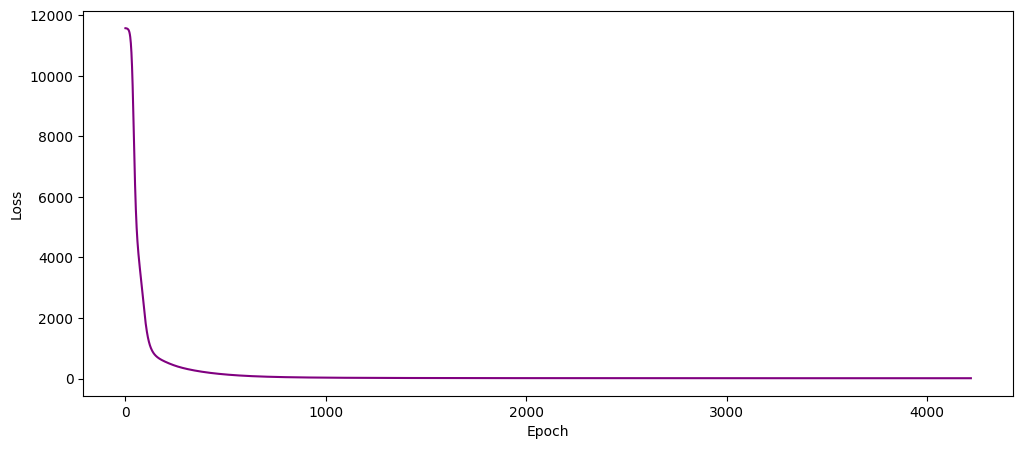

In [224]:
cmps = GeneVector(dataset,
                    output_file=vector_file,
                    emb_dimension=embedding_size,
                    gain=gain,
                    c=c,
                    init_ortho=init_ortho,
                    device=device)

alpha = 0.
beta  = 0.
cmps.train(5000,threshold=1e-6,alpha=alpha, beta=beta, update_interval=100)
embed = GeneEmbedding(vector_file, dataset, vector="average")
cmps.plot()

In [31]:
embed = GeneEmbedding(vector_file, dataset, vector="average")
cembed = CellEmbedding(dataset, embed)

Loading average of 1st and 2nd weights.


100%|██████████| 75350815/75350815 [02:04<00:00, 604348.54it/s]


Generating Cell Vectors.


100%|██████████| 183908/183908 [00:29<00:00, 6272.76it/s]


Found 0 Cells with No Counts.
Finished.


In [109]:
# cembed.batch_correct("batch","MD01-019")
adata = cembed.get_adata()
adata

Loading embedding in X_genevector.
Running Scanpy neighbors and umap.


AnnData object with n_obs × n_vars = 183908 × 642
    obs: 'trb', 'sample', 'patient', 'batch', 'specificity', 'response', 'response_specific', 'CD8 T_SCORE', 'CD4 T_SCORE', 'CD8 T Pseudo-probability', 'CD4 T Pseudo-probability', 'phenotype'
    var: 'gene_ids', 'feature_types', 'entropy'
    uns: 'probability_columns', 'neighbors', 'umap'
    obsm: 'X_genevector', 'X_umap'
    obsp: 'distances', 'connectivities'

In [110]:
ct = []
for x in adata.obs["specificity"]:
    if "viral" in x.lower():
        ct.append("Viral")
    else:
        ct.append(x)
adata.obs["specificity_simple"] = ct


ct = []
for x,y in zip(adata.obs["specificity_simple"],adata.obs["response"]):
    ct.append("{}-{}".format(x,y))
adata.obs["response_specific"] = ct

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import tqdm
import scanpy as sc
import networkx as nx
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
from scipy.spatial import distance
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
import numpy as np
import operator
import collections
import os   
import pandas as pd
import gc
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns


def cell_distance(self, vec, norm=True):
    # matrix = self.matrix
    # if norm:
    #     vec /= np.linalg.norm(vec)
    #     print("norm")
    #     matrix = normalize(matrix)
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    odists = []
    for x in tqdm.tqdm(self.adata.obs.index):
        cell_vec = mapped_components[x]
        # if norm:
        #     cell_vec /= np.linalg.norm(cell_vec)
        dist = 1. - distance.cosine(cell_vec, vec)
        odists.append(dist)
    return odists

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

from sklearn import preprocessing

def phenotype_probability(self, adata, phenotype_markers, return_distances=False, method="sparsemax", target_col="genevector", temperature=0.05, normalize=True):
    """
    Probablistically assign phenotypes based on a set of cell type labels and associated markers. 
    Can optionally return the original cosine distances and perform the assignment based on expression weight gene vectors.
    Loads into the anndata the pseudo-probabilities for each cell type and the deterministic label taken from the maximum probability over cell types.

    :param adata: anndata object generated from "get_adata", has "X_genevector" in the obsm dataframe.
    :type column: anndata.AnnData
    :param phenotype_markers: Dictionary of cell type labels (key) to gene markers used to define the cell type as a list (value).
    :type phenotype_markers: dict
    :param return_distances: Change the return type to a tuple that includes a dictionary containing the actual cosine distances alongside the phenotype probabilities.
    :type column: bool
    :param expression_weighted: Compute similarit to each cell using the expression weightedy marker gnene vector.
    :type column: bool
    :param target_col: Column label to load in deterministic cell asssignments in the obs data frame of the anndata object.
    :type target_col: bool
    :return: Anndata with cell type labels and probabilities, or optionally a tuple with the anndata and the raw cosine similarities.
    :rtype:  anndata.AnnData
    """
    if method == "softmax":
        print(bcolors.OKBLUE+"Using **SoftMax**"+bcolors.ENDC)
        pfunc = softmax
    elif method == "sparsemax":
        print(bcolors.OKBLUE+"Using **SparseMax**"+bcolors.ENDC)
        pfunc = self.entmax_15
    elif method == "normalized_exponential":
        print(bcolors.OKBLUE+"Using Normalized Exponential (Temp: {})".format(temperature)+bcolors.ENDC)
        pfunc = lambda x: self.normalized_exponential_vector(x, temperature)
    for x in adata.obs.columns:
        if "Pseudo-probability" in x:
            del adata.obs[x]
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    genes = adata.var.index.to_list()
    cells = adata.obs.index.to_list()
    all_markers = []
    for _, markers in phenotype_markers.items():
        all_markers += markers  
    all_markers = list(set(all_markers))
    probs = dict()

    for pheno, markers in phenotype_markers.items():
        print(bcolors.OKBLUE+"Computing similarities for {}".format(pheno)+bcolors.ENDC)
        print(bcolors.OKGREEN+"Markers: {}".format(", ".join(markers))+bcolors.ENDC)
        vector = self.embed.generate_vector(markers)
        probs[pheno] = cell_distance(self, vector,norm=normalize)
    distribution = []
    celltypes = []
    for k, v in probs.items():
        distribution.append(v)
        celltypes.append(k)
    distribution = np.array(distribution)
    distribution = preprocessing.normalize(distribution)
    distribution = list(zip(*distribution))
    probabilities = []
    for d in distribution:
        p = pfunc(numpy.array(d))
        probabilities.append(p)
    
    res = {"distances":distribution, "order":celltypes, "probabilities":probabilities}
    barcode_to_label = dict(zip(list(self.data.keys()), res["probabilities"]))
    ct = []
    probs = collections.defaultdict(list)
    for x in adata.obs.index:
        ctx = res["order"][numpy.argmax(barcode_to_label[x])]
        ct.append(ctx)
        for ph, pb in zip(res["order"],barcode_to_label[x]):
            probs[ph].append(pb)
    adata.obs[target_col] = ct
    def load_predictions(adata,probs):
        prob_cols = []
        for ph in probs.keys():
            prob_cols.append(ph+" Pseudo-probability")
            adata.obs[ph+" Pseudo-probability"] = probs[ph]
        adata.uns["probability_columns"] = prob_cols
        return adata
    adata = load_predictions(adata, probs)
    if return_distances:
        return adata, res
    else:
        return adata
markers = dict()
markers["Memory"] = ["GZMK","CRTAM"]
markers["Dysfunctional (MHCII+)"] = ["HLA-DRA","HLA-DQA1","CD74","CXCL13","LAG3"]
markers["Stem-like Memory"] = ["CCR7", "SELL", "IL7R"]
markers["Activated"] = ["GNLY","NKG7","GZMB","PRF1"]
markers["Proliferative"] = ["STMN1","TUBB","H2AFZ"]
markers["TRM"] = ["CXCR6","ZNF683","CD69"]
#markers["MAIT"] = ["CCR6","RORA","AQP3","IL4I1"]
markers = dict()
markers["Naive/CM"] = ["CCR7","SELL"]
markers["Activated"] = ["GZMB"]
markers["Memory"] = ["GZMK","CRTAM"]
markers["Dysfunctional"] = ["CXCL13","LAG3"]
markers['TRM'] = ["CXCR6"]
# adata, dist = phenotype_probability(cembed, adata, markers, method="normalized_exponential", temperature=0.00005, return_distances=True, normalize=True)

adata, dist = phenotype_probability(cembed, adata, markers, method="normalized_exponential", temperature=0.0001, return_distances=True, normalize=True)

Using Normalized Exponential (Temp: 0.0001)
Computing similarities for Naive/CM
Markers: CCR7, SELL


100%|██████████| 183908/183908 [00:02<00:00, 72968.11it/s]


Computing similarities for Activated
Markers: GZMB


100%|██████████| 183908/183908 [00:02<00:00, 71177.09it/s]


Computing similarities for Memory
Markers: GZMK, CRTAM


100%|██████████| 183908/183908 [00:02<00:00, 72343.20it/s]


Computing similarities for Dysfunctional
Markers: CXCL13, LAG3


100%|██████████| 183908/183908 [00:02<00:00, 70605.67it/s]


Computing similarities for TRM
Markers: CXCR6


100%|██████████| 183908/183908 [00:02<00:00, 64835.06it/s]


In [200]:
i = 0
main_color_map = dict()
adata = adata.copy()
colors = tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy()
for x in ["genevector", "response","specificity_simple", "response_specific"]:
    ct = []
    for i, val in enumerate(set(adata.obs[x].tolist())):
        c = colors.pop(i)
        ct.append(c)
        main_color_map[val] = c
    adata.uns["{}_colors".format(x)] = ct

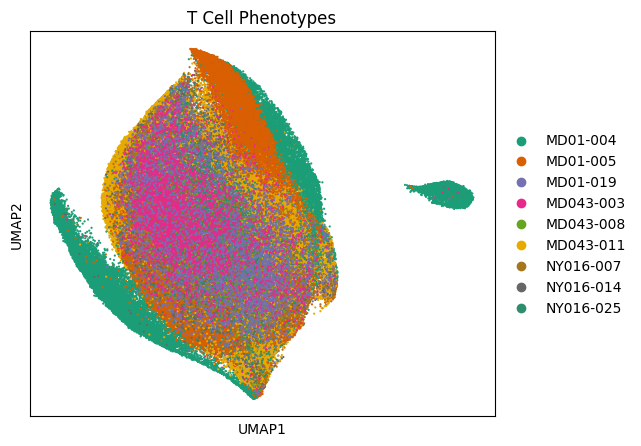

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(6,5))
sc.pl.umap(adata,color="batch",s=10,title="T Cell Phenotypes", add_outline=False,ax=ax, show=False)
fig.savefig("/Users/ceglian/umap_phenotypes.pdf")

In [39]:
markers = dict()
markers["Naive/CM"] = ["CCR7","SELL"]
markers["Activated"] = ["GZMB"]
markers["Memory"] = ["GZMK","CRTAM"]
markers["Dysfunctional"] = ["CXCL13","LAG3"]
markers['TRM'] = ["CXCR6"]
trm_genes = """ITGAE
GSG2
MYO7A
GPR25
KRT86
SPRY1
CLNK
SRGAP3
ATP8B4
AFAP1L2
KLRC1
ETV1
GOLIM4
DOCK5
ZNF683
CTLA4
DAPK2
CHN1
PHLDA1
SARDH
ARHGAP11A
KIF5C
TMIGD2
DFNB31
KIAA0101
UAP1L1
RBPJ
C15orf53
PDCD1
MIR155HG
INPP5F
PTMS
TMEM200A
PGLYRP2
MKI67
ATP10D
AHI1
XCL1
XYLT1
SLC27A2
IVNS1ABP
CXCR6
ATL2
CD226
AMICA1
ITGA1
PDE4A
CAPG
ACSL4
ADAM19""".splitlines()

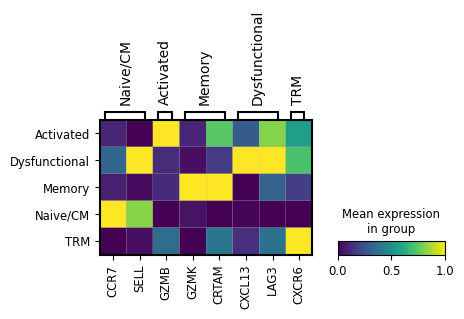

In [40]:
sc.pl.matrixplot(adata,markers,groupby="genevector",standard_scale="var")

In [41]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

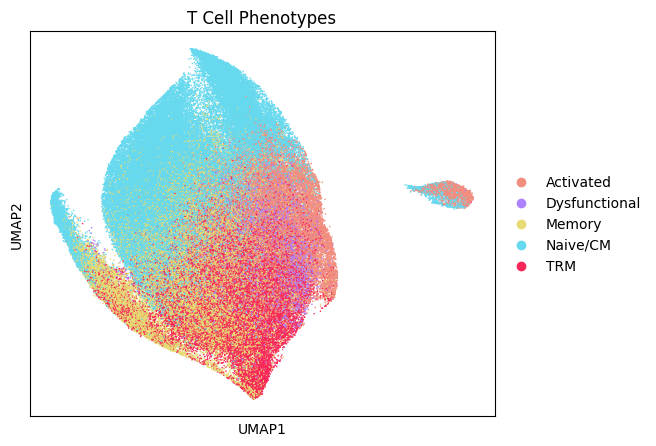

In [42]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sc.pl.umap(adata,color="genevector",s=5,title="T Cell Phenotypes", add_outline=False,ax=ax, show=False)
fig.savefig("/Users/ceglian/umap_phenotypes.pdf")

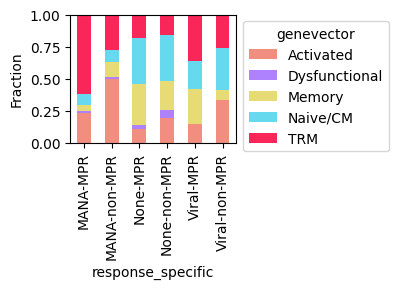

In [43]:
def plot_fraction(adata,category,variable,save=None,color=None):
    df = adata.obs
    count_df = df.groupby([category, variable]).size().unstack(fill_value=0)
    proportion_df = count_df.divide(count_df.sum(axis=1), axis=0)
    proportion_df.plot(kind="bar", stacked=True, figsize=(4,3),color=color)
    plt.ylabel("Fraction")
    plt.ylim([0, 1])
    plt.legend(title=variable, loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    if save != None:
        plt.savefig(save)
plot_fraction(adata,"response_specific","genevector",color=adata.uns["genevector_colors"],save="/Users/ceglian/fraction.pdf")

In [115]:
tcri.pp.register_clonotype_key(adata,"trb")

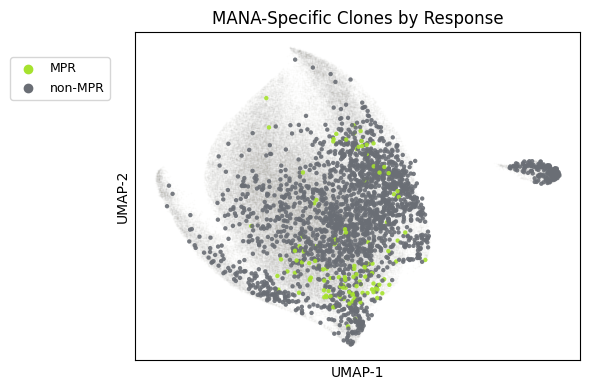

In [45]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import matplotlib.patches as mpatches

from gseapy import dotplot
import tqdm

import collections
import operator
import itertools

from tcri.pl import tcri_colors

def top_clone_umap(adata, reduction="umap", top_n=10, fg_alpha=0.9, fg_size=25, bg_size=0.1, bg_alpha=0.6, figsize=(12,5), return_df=False,save=None):
    df = adata.obs
    seq_column = adata.uns["tcri_clone_key"]
    plt.figure(figsize = figsize)
    clonotype_counts = collections.defaultdict(int)
    response_dict = dict()
    for clonotype,r,s in zip(df[seq_column],df["specificity"],df["response"]):
        if r == "MANA":
            clonotype_counts[clonotype] += 1
            response_dict[clonotype] = s
    top_clonotypes = sorted(clonotype_counts.items(), key=operator.itemgetter(1),reverse=True)
    top_clonotypes = [x[0] for x in top_clonotypes[:top_n]]
    ax1 = plt.subplot(1,1,1)
    x = [x[0] for x in adata.obsm["X_{}".format(reduction)]]
    y = [x[1] for x in adata.obsm["X_{}".format(reduction)]]
    sns.scatterplot(x=x,y=y, color="#75715E",  alpha=bg_alpha, ax=ax1, s=bg_size, linewidth=0.0)
    xonly = []
    yonly = []
    clonotype_labels = []
    size = []
    for clonotype,x1,y1 in zip(df[seq_column],x,y):
        clonotype = str(clonotype)
        if clonotype not in top_clonotypes or clonotype == "None" or clonotype == "nan":
            continue
        else:
            xonly.append(x1)
            yonly.append(y1)
            size.append(1/clonotype_counts[clonotype])
            clonotype_labels.append(response_dict[clonotype])         #str(clonotype) + " {}".format(clonotype_counts[clonotype]))
    dftop = pd.DataFrame.from_dict({"TCR Sequence":clonotype_labels,"Cells":size, "UMAP1":xonly,"UMAP2":yonly})
    colors = [main_color_map["non-MPR"],main_color_map["MPR"]]#tcri_colors + tcri_colors + tcri_colors
    order = []
    for c in set(clonotype_labels):
        if c != "_Other":
            order.append(c)
    colors = colors[:len(set(clonotype_labels))]
    sns.scatterplot(data=dftop, x="UMAP1", y="UMAP2", hue="TCR Sequence", hue_order=order, ax=ax1, alpha=fg_alpha,s=fg_size, linewidth=0.0,palette=colors)
    ax1.set_xlabel('UMAP-1')
    ax1.set_ylabel('UMAP-2')
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    ax1.set_title("MANA-Specific Clones by Response")
    h,l = ax1.get_legend_handles_labels()
    ax1.legend(h[:top_n-1], l[:top_n-1], borderaxespad=2.,fontsize='9',bbox_to_anchor=(0, 1), loc='best')
    plt.tight_layout()
    if return_df:
        return dftop
    elif save != None:
        plt.savefig(save)
top_clone_umap(adata, top_n=1000, fg_size=10, figsize=(6,4),bg_size=1, bg_alpha=0.02, save="/Users/ceglian/smith_clones.pdf")

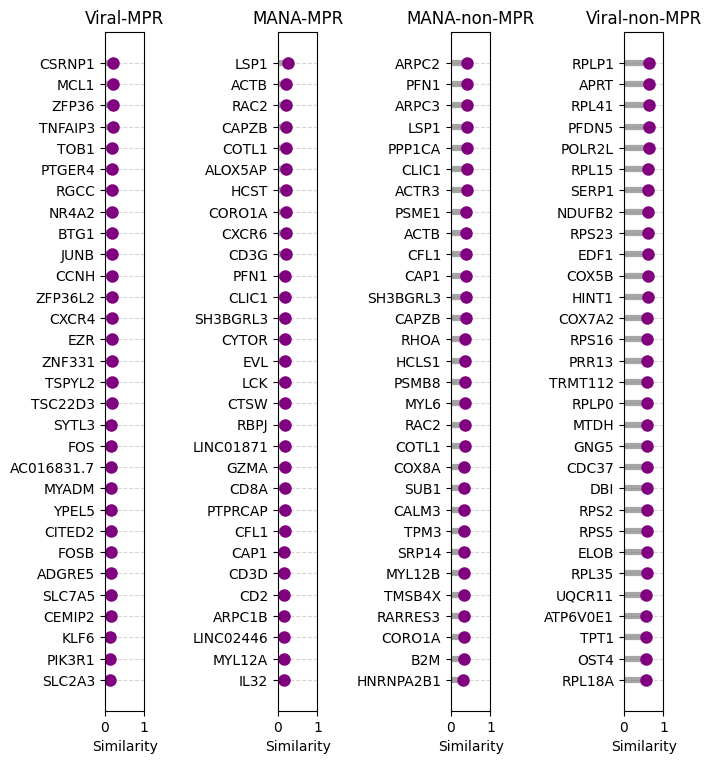

In [248]:
import numpy
import pandas as pd
def get_predictive_genes(self, adata, label, n_genes=10):
    """
    Compute the top n most similar genes to a given variable in the dataset.

    :param adata: anndata object generated from "get_adata", has "X_genevector" in the obsm dataframe.
    :type column: anndata.AnnData
    :param label: Label that defines the cateogies to find predictive genes.
    :type column: str
    :param n_genes: Number of most similar genes to return for each category.
    :type column: int
    :return: The most similar genes to each label stored in a dictionary.
    :rtype:  dict
    """
    vectors = dict()
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    comps = collections.defaultdict(list)
    for bc,x in zip(adata.obs.index,adata.obs[label]):
        comps[x].append(mapped_components[bc])
    mean_vecs = []
    for x, vec in comps.items():
        ovecs = []
        vec = numpy.average(vec,axis=0)
        for oph, ovec in comps.items():
            if oph != x:
                ovecs.append(numpy.average(ovec,axis=0))
        aovec = numpy.median(ovecs,axis=0)
        vector = numpy.subtract(vec,aovec)
        # vector = numpy.subtract(vector,self.dataset_vector)
        vectors[x] = vector
    markers = dict()
    for x, mvec in vectors.items():
        ct_sig = self.embed.get_similar_genes(mvec)[:n_genes]
        markers[x] = pd.DataFrame.from_dict(ct_sig)
    return markers

# data = []
# x = get_predictive_genes(cembed, adata,"response",n_genes=30)
# print(x)
# data.append(("MPR",x["MPR"]))
# x = get_predictive_genes(cembed, adata,"specificity",n_genes=30)
# print(x)
# data.append(("MANA",x["MANA"]))
# x = get_predictive_genes(cembed, adata,"response_specific",n_genes=30)
# print(x.keys())
# data.append(("MANA-non-MPR",x["MANA-non-MPR"]))
# x = get_predictive_genes(cembed, adata,"response_specific",n_genes=30)
# print(x)
# data.append(("MANA-MPR",x["MANA-MPR"]))
data = []
for x in get_predictive_genes(cembed, adata, "response_specific",n_genes=30).items():
    if "None" in x[0]: continue
    data.append(x)

fig, axes = plt.subplots(nrows=1, ncols=len(data), figsize=(1.8 * len(data), 8))

# If there's only one dataframe, axes might not be an array
if len(data) == 1:
    axes = [axes]

color_point = 'purple'
color_line = 'gray'

# Generate each lollipop plot
for ax, df in zip(axes, data):
    label = df[0]
    df = df[1]
    # Sort values for better visualization
    df_sorted = df.sort_values('Similarity', ascending=True)
    ax.hlines(y=df_sorted['Gene'], xmin=0, xmax=df_sorted['Similarity'], color=color_line, alpha=0.7, linewidth=4.5)
    ax.plot(df_sorted['Similarity'], df_sorted['Gene'], 'o', color=color_point, markersize=8)
    ax.set_title(label)
    ax.set_xlabel('Similarity')
    ax.set_xlim(0, 1)  # Assuming similarity scores are between 0 and 1
    ax.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
    ax.set_axisbelow(True)  # Ensure grid lines are below the plot elements

# Adjust layout to avoid tight squeezing of elements
plt.tight_layout(pad=2.0)

# Show plot
plt.savefig("/Users/ceglian/res.pdf")

In [258]:
import gseapy as gp
ress = dict()
for d in data:
    #print(d[0],set(d[1]["Gene"]).intersection(set(trm_genes)))#ADD8E6
    enr = gp.enrichr(gene_list=d[1]["Gene"].tolist(), # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    ress[d[0]] = enr.res2d

In [276]:
ress["Viral-MPR"].head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,TNF signaling pathway,4/112,0.000023,0.002468,0,0,28.293447,302.393443,TNFAIP3;FOS;PIK3R1;JUNB
1,KEGG_2021_Human,Osteoclast differentiation,4/127,0.000037,0.002468,0,0,24.824265,253.062286,FOSB;FOS;PIK3R1;JUNB
2,KEGG_2021_Human,IL-17 signaling pathway,3/94,0.000372,0.016381,0,0,24.272283,191.649164,FOSB;TNFAIP3;FOS
3,KEGG_2021_Human,Leukocyte transendothelial migration,3/114,0.000655,0.019577,0,0,19.878879,145.744010,CXCR4;PIK3R1;EZR
4,KEGG_2021_Human,"Growth hormone synthesis, secretion and action",3/119,0.000742,0.019577,0,0,19.017241,137.052553,FOS;PIK3R1;JUNB
5,KEGG_2021_Human,Measles,3/139,0.001162,0.023311,0,0,16.204248,109.495545,TNFAIP3;FOS;PIK3R1
6,KEGG_2021_Human,Apoptosis,3/142,0.001236,0.023311,0,0,15.852118,106.141318,FOS;PIK3R1;MCL1
7,KEGG_2021_Human,Kaposi sarcoma-associated herpesvirus infection,3/193,0.002965,0.043388,0,0,11.567251,67.331851,ZFP36;FOS;PIK3R1
8,KEGG_2021_Human,Human immunodeficiency virus 1 infection,3/212,0.003861,0.043388,0,0,10.505582,58.378925,CXCR4;FOS;PIK3R1
9,KEGG_2021_Human,Regulation of actin cytoskeleton,3/218,0.004174,0.043388,0,0,10.209302,55.935380,CXCR4;PIK3R1;EZR


In [275]:
ress["Viral-non-MPR"].head(20)["Genes"].tolist()[1]

'RPL41;RPS16;RPL18A;RPLP1;RPS5;RPLP0;RPL35;RPL15;RPS2;RPS23'

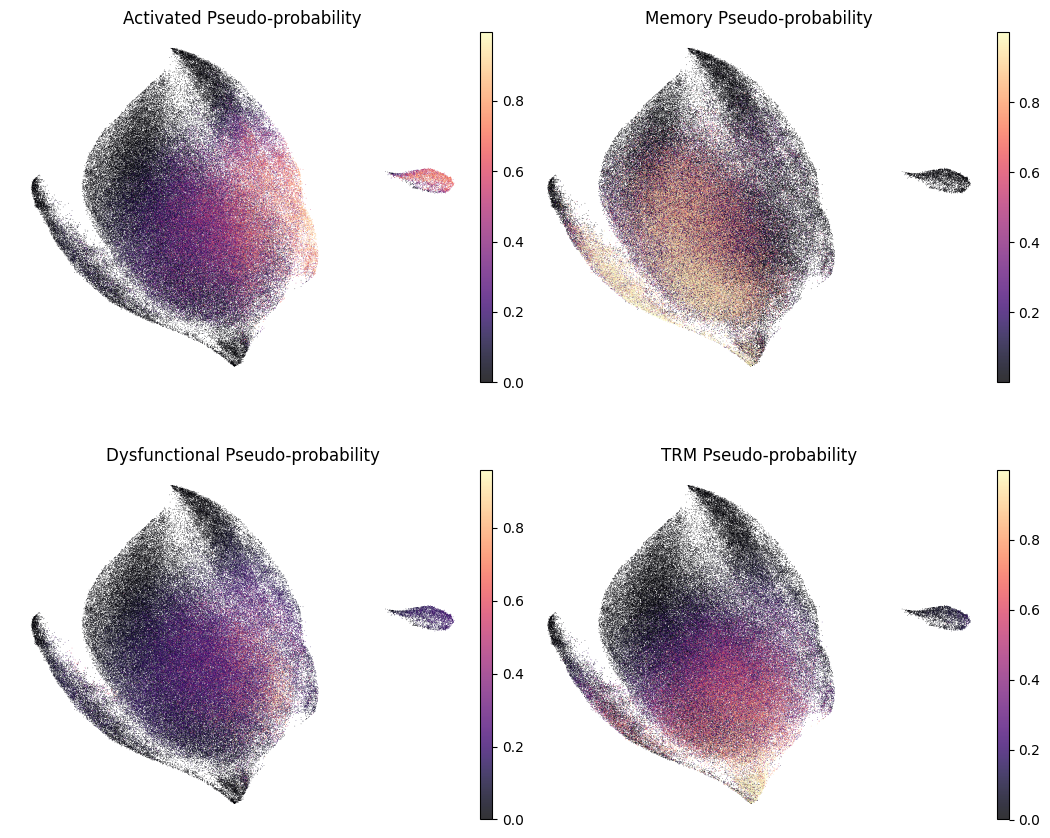

'/Users/ceglian/umapprobs.pdf'

In [226]:
import shutil
cols = adata.uns["probability_columns"]
# cols.remove("Naive/CM Pseudo-probability")
sc.pl.umap(adata,color=cols,s=1,ncols=2,cmap="magma",alpha=0.8,save="probs.pdf",frameon=False,wspace=0.01)
shutil.copyfile("figures/umapprobs.pdf","/Users/ceglian/umapprobs.pdf")

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import matplotlib.patches as mpatches
from statannotations.Annotator import Annotator
from tcri.pl import tcri_colors

from gseapy import dotplot
import tqdm

import collections
import operator
import itertools

from tcri.utils import Phenotypes, CellRepertoire, Tcell, plot_pheno_sankey, plot_pheno_ternary_change_plots, draw_clone_bars, probabilities
from tcri.preprocessing import clone_size, joint_distribution
from tcri.metrics import clonotypic_entropies as centropies
from tcri.metrics  import phenotypic_entropies as pentropies
from tcri.metrics  import clonality as clonality_tl
from tcri.metrics  import flux as flux_tl
from tcri.metrics  import probability_distribution as pdistribution
from tcri.metrics  import mutual_information as mutual_information_tl
from tcri.metrics  import phenotypic_entropy_delta as phenotypic_entropy_delta_tl
from tcri.metrics  import clone_fraction as clone_fraction_tl


def tcri_boxplot(adata, function, groupby=None,ylabel="", splitby=None,figsize=(8,4),s=20,order=None, hue_order=None, palette=None, add_stats=True):
    if palette == None:
        palette = tcri_colors
    if groupby == None and splitby == None:
        data = function(adata)
        df = pd.DataFrame(list(data.items()), columns=['Phenotype', 'Clonotypic Entropy'])
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        fig,ax=plt.subplots(1,1,figsize=figsize)
        sns.stripplot(data=df,x="Phenotype",y=ylabel,s=s,ax=ax, palette=palette)
        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_ylabel(ylabel)
        ax.set_title(ylabel)
        fig.tight_layout()
    elif groupby != None and splitby == None:
        groups = adata.obs[groupby].unique()
        dfs = []
        for group in groups:
            data = function(adata[adata.obs[groupby]==group])
            df = pd.DataFrame(list(data.items()), columns=['Phenotype',ylabel])
            df[groupby] = group
            dfs.append(df)
        df = pd.concat(dfs)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        if order == None:
            order = df.groupby(["Phenotype"]).median(ylabel).sort_values(ylabel).index.tolist()
        fig,ax=plt.subplots(1,1,figsize=figsize)
        sns.stripplot(data=df,x="Phenotype",y=ylabel,s=s,hue=groupby,ax=ax,order=order, palette=palette)
        sns.boxplot(data=df,x="Phenotype",y=ylabel,ax=ax, color="#999999",order=order)

        annotator = Annotator(ax, pairs=[("Thur", "Fri"), ("Fri", "Sat"), ("Sat", "Sun")], data=df, x="day", y="total_bill")
        annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()


        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_title(ylabel)
        ax.set_ylabel(ylabel)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        fig.tight_layout()
    elif groupby != None and splitby != None:
        groups = adata.obs[groupby].unique()
        dfs = []
        for group in groups:
            sub = adata[adata.obs[groupby]==group]
            splits = sub.obs[splitby].unique()
            for split in splits:
                data = function(sub[sub.obs[splitby]==split])
                df = pd.DataFrame(list(data.items()), columns=['Phenotype', ylabel])
                df[groupby] = group
                df[splitby] = split
                dfs.append(df)
        df = pd.concat(dfs)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        fig,ax=plt.subplots(1,1,figsize=figsize)
        if order == None:
            order = df.groupby(["Phenotype"]).median(ylabel).sort_values(ylabel).index.tolist()
        if hue_order == None:
            hue_order = list(sorted(set(df[splitby])))
        print(order)
        if add_stats:
            pairs = []
            hpairs = list(itertools.combinations(hue_order, 2))
            for x in order:
                print(x)
                for z,w in hpairs:
                    pairs.append(((x,z),(x,w)))
                print(pairs)
        print(pairs)
        sns.boxplot(data=df,
                    x="Phenotype",
                    y=ylabel,
                    ax=ax, 
                    hue=splitby,
                    order=order,
                    hue_order=hue_order,
                    palette=palette)
        annotator = Annotator(ax, pairs=pairs, data=df, x="Phenotype", y=ylabel, hue=splitby,order=order, hue_order=hue_order)
        annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_title(ylabel)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_ylabel(ylabel)
        fig.tight_layout()
    else:
        raise ValueError("'groupby' must be set to use 'splitby'.")
    return ax

def clonality(adata, groupby = None, splitby=None, s=10, order=None, figsize=(12,5), palette=None):
    return tcri_boxplot(adata,clonality_tl, ylabel="Clonality", groupby=groupby, splitby=splitby, s=s, figsize=figsize, order=order, palette=palette)

def clonotypic_entropy(adata, method="probabilistic", normalized=True, groupby=None, splitby=None, s=10, figsize=(12,5), order=None, palette=None):
    func = lambda x : centropies(x, normalized=normalized, method=method)
    return tcri_boxplot(adata, func, groupby=groupby, ylabel="Clonotypic Entropy", splitby=splitby, s=s, figsize=figsize, order=order, palette=palette)

In [51]:
adata = adata.copy()
tcri.pp.register_phenotype_key(adata,"genevector")
tcri.pp.register_clonotype_key(adata,"trb")

In [52]:
tcri.pp.joint_distribution(adata)

In [53]:
porder = ['Naive/CM', 'Memory', 'TRM', 'Activated','Dysfunctional']

In [55]:
# mpr = main_color_map["MPR"]
# main_color_map["MPR"] = main_color_map["non-MPR"]
# main_color_map["Non-MPR"] = mpr 

In [219]:
ct = []
for x in adata.obs["sample"]:
    if "tum" in x.lower():
        ct.append("Tumor")
    elif "nor" in x.lower():
        ct.append("Normal")
    elif "ln" in x.lower():
        ct.append("LN")
    else:
        ct.append("Tumor")
adata.obs["site"] = ct

['Naive/CM', 'Memory', 'TRM', 'Activated', 'Dysfunctional']
Naive/CM
[(('Naive/CM', 'MPR'), ('Naive/CM', 'non-MPR'))]
Memory
[(('Naive/CM', 'MPR'), ('Naive/CM', 'non-MPR')), (('Memory', 'MPR'), ('Memory', 'non-MPR'))]
TRM
[(('Naive/CM', 'MPR'), ('Naive/CM', 'non-MPR')), (('Memory', 'MPR'), ('Memory', 'non-MPR')), (('TRM', 'MPR'), ('TRM', 'non-MPR'))]
Activated
[(('Naive/CM', 'MPR'), ('Naive/CM', 'non-MPR')), (('Memory', 'MPR'), ('Memory', 'non-MPR')), (('TRM', 'MPR'), ('TRM', 'non-MPR')), (('Activated', 'MPR'), ('Activated', 'non-MPR'))]
Dysfunctional
[(('Naive/CM', 'MPR'), ('Naive/CM', 'non-MPR')), (('Memory', 'MPR'), ('Memory', 'non-MPR')), (('TRM', 'MPR'), ('TRM', 'non-MPR')), (('Activated', 'MPR'), ('Activated', 'non-MPR')), (('Dysfunctional', 'MPR'), ('Dysfunctional', 'non-MPR'))]
[(('Naive/CM', 'MPR'), ('Naive/CM', 'non-MPR')), (('Memory', 'MPR'), ('Memory', 'non-MPR')), (('TRM', 'MPR'), ('TRM', 'non-MPR')), (('Activated', 'MPR'), ('Activated', 'non-MPR')), (('Dysfunctional', 'MP

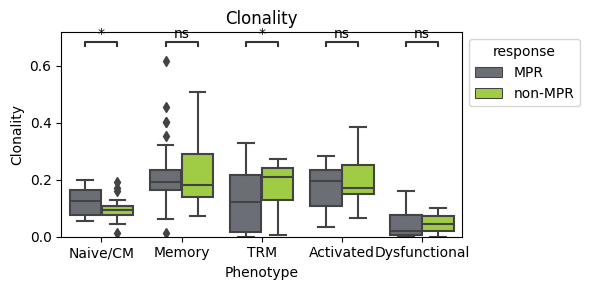

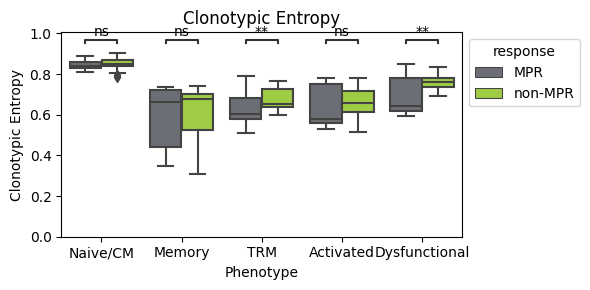

In [57]:
xdata = adata[adata.obs["site"] == "Tumor"]
tcri.pp.joint_distribution(xdata)

clonality(xdata,groupby="sample",splitby="response",figsize=(6,3),palette=main_color_map, order=porder)
plt.savefig("/Users/ceglian/clonality_response.pdf")
clonotypic_entropy(xdata,groupby="sample",splitby="response",method="probabilistic",figsize=(6,3),palette=main_color_map, order=porder)
plt.savefig("/Users/ceglian/cent_response.pdf")

[('None-non-MPR', 'Viral-non-MPR'), ('None-non-MPR', 'None-MPR'), ('None-non-MPR', 'MANA-MPR'), ('None-non-MPR', 'MANA-non-MPR'), ('None-non-MPR', 'Viral-MPR'), ('Viral-non-MPR', 'None-MPR'), ('Viral-non-MPR', 'MANA-MPR'), ('Viral-non-MPR', 'MANA-non-MPR'), ('Viral-non-MPR', 'Viral-MPR'), ('None-MPR', 'MANA-MPR'), ('None-MPR', 'MANA-non-MPR'), ('None-MPR', 'Viral-MPR'), ('MANA-MPR', 'MANA-non-MPR'), ('MANA-MPR', 'Viral-MPR'), ('MANA-non-MPR', 'Viral-MPR')]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

None-non-MPR vs. Viral-non-MPR: Mann-Whitney-Wilcoxon test two-sided, P_val:2.758e-03 U_stat=1.912e+04
Viral-non-MPR vs. None-MPR: Mann-Whitney-Wilcoxon test two-sided, P_val:4.822e-03 U_stat=4.332e+03
None-MPR vs. MANA-MPR: Mann-Whitney-Wilcoxon test two-sided, P_val:8.540e-01 U_stat=2.521e+03
MANA-MPR vs. MANA-non-MPR: Mann-Whitney-Wilcoxon te

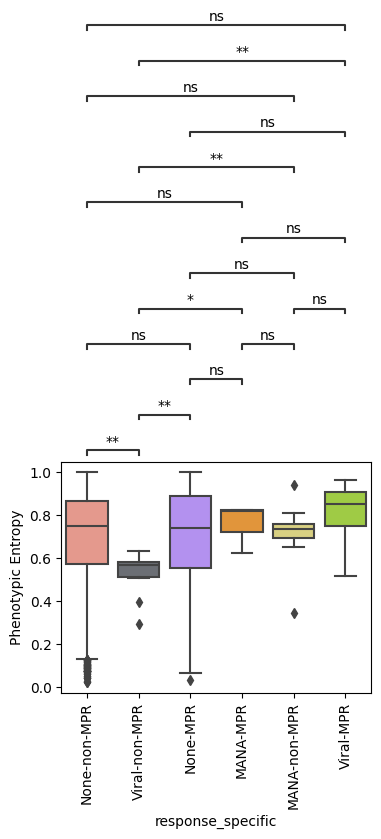

In [225]:
from tcri.tl import phenotypic_entropies as pentropies
from tcri.pl import tcri_colors
def phenotypic_entropy(adata, groupby, splitby, method="probabilistic", return_df=False, normalized=True, decimals=5, figsize=(5,4), save=None, order=None, rotation=0, minimum_clone_size=1, palette=None):
    ps = []
    rs = []
    r2 = []
    ts = []
    for r in set(adata.obs[groupby]):
        rdata = adata[adata.obs[groupby] == r]
        clone_size(rdata)
        rdata = rdata[rdata.obs["clone_size"] >= minimum_clone_size]
        for p in set(rdata.obs[splitby]):
            pdata = rdata[rdata.obs[splitby] == p]
            for clone, ent in pentropies(pdata,method=method,normalized=normalized,decimals=decimals).items():
                rs.append(p)
                r2.append(ent)
                ts.append(clone)
                ps.append(r)
    df = pd.DataFrame.from_dict({groupby:ps,splitby:rs,"Phenotypic Entropy":r2,"Clone":ts})
    fig, ax = plt.subplots(1,1,figsize=figsize)
    if order == None:
        order = list(set(rs))
    if palette == None:
        palette = tcri_colors
    sns.boxplot(data=df, x=splitby,y="Phenotypic Entropy",ax=ax,order=order,palette=palette)
    pairs = list(itertools.combinations(set(df[splitby]),2))
    print(pairs)
    annotator = Annotator(ax, pairs=pairs, data=df, x=splitby, y="Phenotypic Entropy",order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    plt.xticks(rotation=rotation)
    if save!=None:
        fig.savefig(save)
    if return_df:
        return df
xdata = adata[adata.obs["clone_size"] > 1]
xdata = xdata[xdata.obs['site'] == "Tumor"]
tcri.pp.joint_distribution(xdata)
df = phenotypic_entropy(xdata, groupby="batch",splitby="response_specific",rotation=90, normalized=True, save="/Users/ceglian/smith_phenotypic_entropy_specificity.pdf",minimum_clone_size=3, return_df=True,figsize=(4,3))

# from scipy.stats import ttest_ind
# x = df[df["specificity"] == "Other"]["Phenotypic Entropy"].tolist()
# y = df[df["specificity"] != "Other"]["Phenotypic Entropy"].tolist()
# ttest_ind(x,y,equal_var=False)

In [23]:
dict(zip(adata.obs["batch"],adata.obs["response"]))

{'MD01-005': 'MPR',
 'MD043-011': 'non-MPR',
 'MD01-004': 'non-MPR',
 'MD043-003': 'MPR',
 'MD01-019': 'non-MPR',
 'NY016-014': 'non-MPR',
 'NY016-025': 'MPR',
 'NY016-007': 'non-MPR',
 'MD043-008': 'MPR'}

0.24885064999022388
0.5530308344036126
0.3551878051157913
0.03926348190688733
0.8199506608549658
0.07754584637172801
0.11909036484875557
0.09569986295855237
0.7355647623283481
0.17735181891510798
0.5899924176569762
0.3925639809523247
0.4080204117297981
1.0184418016120809
0.18996697049828049
0.6875424844241529
0.6697459301036588
0.0032845609709775125
0.5621674105695309


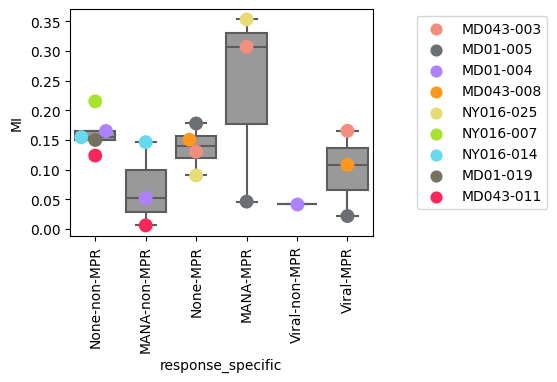

In [59]:
from tcri.tl import mutual_information as mutual_information_tl
from tcri.pp import joint_distribution

import numpy as np

import numpy as np

def entropy(p):
    """ Calculate entropy for a probability distribution. """
    p = p[p > 0]  # Remove zeros to avoid log(0)
    return -np.sum(p * np.log2(p))

def mutual_information_tl(joint_prob):
    """ Calculate mutual information from a joint probability matrix. """
    p_x = np.sum(joint_prob, axis=1)
    p_y = np.sum(joint_prob, axis=0)
    h_x = entropy(p_x)
    h_y = entropy(p_y)
    h_joint = entropy(joint_prob.flatten())
    return h_x + h_y - h_joint

def normalized_mutual_information(joint_prob):
    """ Calculate normalized mutual information from a joint probability matrix. """
    mi = mutual_information_tl(joint_prob)
    print(mi)
    p_x = np.sum(joint_prob, axis=1)
    p_y = np.sum(joint_prob, axis=0)
    h_x = entropy(p_x)
    h_y = entropy(p_y)
    return mi / np.sqrt(h_x * h_y)  # Normalize by the geometric mean of the entropies


def mutual_information(adata, groupby, splitby=None, method="probabilistic", box_color="#999999", size=10, figsize=(6,5), colors=None, minimum_clone_size=1, rotation=90,return_df=False,bbox_to_anchor=(1.15, 1.), order=None):
    mis = []
    groups = []
    splits = []
    for group in set(adata.obs[groupby]):
        gdata = adata[adata.obs[groupby] == group]
        clone_size(gdata)
        gdata = gdata[gdata.obs["clone_size"] >= minimum_clone_size]
        if splitby != None:
            for split in set(gdata.obs[splitby]):
                sdata = gdata[gdata.obs[splitby] == split]
                tcri.pp.joint_distribution(sdata)
                jd = sdata.uns["joint_distribution"].to_numpy()
                mi = normalized_mutual_information(jd / jd.sum())
                mis.append(mi)
                groups.append(group)
                splits.append(split)
        else:
            joint_distribution(gdata)
            mi = mutual_information_tl(gdata,method=method)
            mis.append(mi)
            groups.append(group)
    df = pd.DataFrame.from_dict({"MI":mis, groupby: groups})
    if splitby != None:
        df[splitby] = splits
    if order == None:
        order = list(set(adata.obs[splitby]))
    if colors == None:
        colors = tcri_colors
    fig, ax = plt.subplots(1,1,figsize=figsize)
    sns.boxplot(data=df,x=splitby,y="MI",ax=ax,order=order, color=box_color)
    sns.swarmplot(data=df,x=splitby,y="MI",order=order ,s=size, hue=groupby, palette=colors)
    fig.tight_layout()
    plt.xticks(rotation=rotation)
    _ = ax.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor)
    if return_df:
        return df
    else:
        return ax

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
tcri.pp.clone_size(adata)
xdata = adata[adata.obs["clone_size"] > 0]
# xdata = xdata[xdata.obs['site'] == "Tumor"]
tcri.pp.joint_distribution(xdata)
df = mutual_information(xdata,groupby="batch",
                            figsize=(4,3),splitby="response_specific",
                            method="probabilistic",minimum_clone_size=1,
                            return_df=True,bbox_to_anchor=(1.6,1)) #save=
plt.savefig("/Users/ceglian/smith_mutual_info_specificity.pdf")
# x = df[df["response"] == "MPR"]["MI"].tolist()
# y = df[df["response"] != "Non-MPR"]["MI"].tolist()
# ttest_ind(x,y,equal_var=False)

In [ ]:
main_color_map["Viral"] = main_color_map["MANA"]
main_color_map["MANA"] = "#4B5320"
main_color_map["None"] = "#FFFFFF"

[('MANA', 'Viral'), ('MANA', 'None'), ('Viral', 'None')]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MANA vs. Viral: Mann-Whitney-Wilcoxon test two-sided, P_val:3.788e-04 U_stat=3.000e+02
Viral vs. None: Mann-Whitney-Wilcoxon test two-sided, P_val:1.943e-07 U_stat=1.378e+06
MANA vs. None: Mann-Whitney-Wilcoxon test two-sided, P_val:5.362e-01 U_stat=6.547e+05


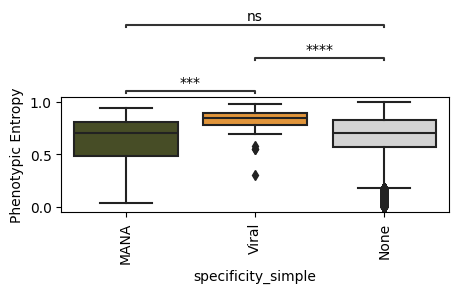

In [244]:

from tcri.tl import phenotypic_entropies as pentropies
from tcri.pl import tcri_colors
main_color_map["None"] = "#d3d3d3"
def phenotypic_entropy(adata, groupby, splitby, method="probabilistic", return_df=False, normalized=True, decimals=5, figsize=(5,4), save=None, order=None, rotation=0, minimum_clone_size=1, palette=None):
    ps = []
    rs = []
    r2 = []
    ts = []
    for r in set(adata.obs[groupby]):
        rdata = adata[adata.obs[groupby] == r]
        clone_size(rdata)
        rdata = rdata[rdata.obs["clone_size"] >= minimum_clone_size]
        for p in set(rdata.obs[splitby]):
            pdata = rdata[rdata.obs[splitby] == p]
            for clone, ent in pentropies(pdata,method=method,normalized=normalized,decimals=decimals).items():
                rs.append(p)
                r2.append(ent)
                ts.append(clone)
                ps.append(r)
    df = pd.DataFrame.from_dict({groupby:ps,splitby:rs,"Phenotypic Entropy":r2,"Clone":ts})
    fig, ax = plt.subplots(1,1,figsize=figsize)
    if order == None:
        order = list(set(rs))
    if palette == None:
        palette = tcri_colors
    sns.boxplot(data=df, x=splitby,y="Phenotypic Entropy",ax=ax,order=order,palette=palette)
    pairs = list(itertools.combinations(set(df[splitby]),2))
    print(pairs)
    annotator = Annotator(ax, pairs=pairs, data=df, x=splitby, y="Phenotypic Entropy",order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    plt.xticks(rotation=rotation)
    if save!=None:
        fig.savefig(save)
    if return_df:
        return df
tcri.pp.clone_size(adata)
sub = adata[adata.obs["clone_size"] > 0]
# sub = sub[sub.obs['site'] == "Tumor"]
phenotypic_entropy(sub,groupby="batch", splitby="specificity_simple", rotation=90, figsize=(5,1.5),save="/Users/ceglian/pent_smith.pdf",palette=main_color_map)

In [247]:
for x in trm_genes:
    print(x)

ITGAE
GSG2
MYO7A
GPR25
KRT86
SPRY1
CLNK
SRGAP3
ATP8B4
AFAP1L2
KLRC1
ETV1
GOLIM4
DOCK5
ZNF683
CTLA4
DAPK2
CHN1
PHLDA1
SARDH
ARHGAP11A
KIF5C
TMIGD2
DFNB31
KIAA0101
UAP1L1
RBPJ
C15orf53
PDCD1
MIR155HG
INPP5F
PTMS
TMEM200A
PGLYRP2
MKI67
ATP10D
AHI1
XCL1
XYLT1
SLC27A2
IVNS1ABP
CXCR6
ATL2
CD226
AMICA1
ITGA1
PDE4A
CAPG
ACSL4
ADAM19


Using Normalized Exponential (Temp: 1e-05)
Computing similarities for IL7R/IL2RG
Markers: IL7R


100%|██████████| 183908/183908 [00:02<00:00, 69905.04it/s]


Computing similarities for IL-7 Supression
Markers: SOCS1, SOCS2


100%|██████████| 183908/183908 [00:02<00:00, 73756.42it/s]


Computing similarities for JAK-STAT Signaling
Markers: JAK1, JAK3, STAT5A, STAT5B


100%|██████████| 183908/183908 [00:02<00:00, 74134.26it/s]


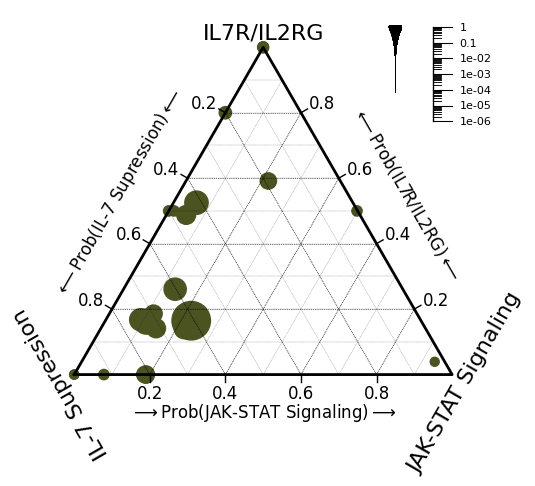

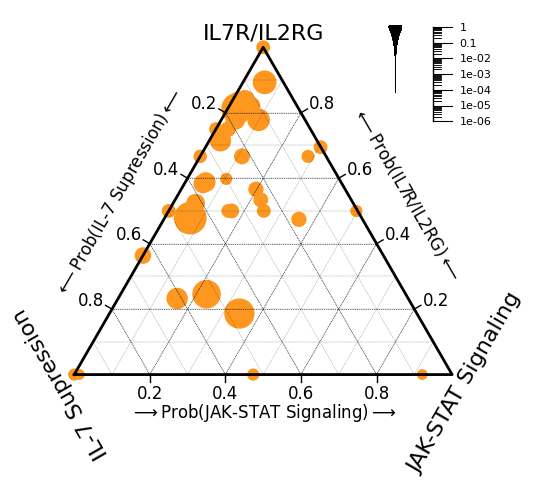

In [193]:
copy = adata.copy()
for x in copy.obs.columns.tolist():
    if "Pseudo" in x:
        del copy.obs[x]

markers = dict()
markers["IL7R/IL2RG"] = ["IL7R"]
markers["IL-7 Supression"] = ["SOCS1","SOCS2"]
markers["JAK-STAT Signaling"] = ["JAK1","JAK3","STAT5A","STAT5B"]

copy, dist = phenotype_probability(cembed, copy, markers, method="normalized_exponential", temperature=0.00001, return_distances=True, normalize=True, target_col="mana_v_viral")
tcri.pp.register_phenotype_key(copy,"mana_v_viral")
xdata = copy[copy.obs["specificity_simple"].isin(["Viral","MANA"])]
# xdata = xdata[xdata.obs["clone_size"] > 1]
tcri.pp.joint_distribution(xdata)
tcri.pl.probability_ternary(xdata,phenotype_names=["IL7R/IL2RG","IL-7 Supression","JAK-STAT Signaling"], nt=False, method="probabilistic",
             splitby="specificity_simple",conditions=["MANA"], top_n=60,color="#4B5320", scale_function=lambda x :  30*(x**(1/5)),
             save="/Users/ceglian/mana_nresponse_tern.pdf")
tcri.pl.probability_ternary(xdata,phenotype_names=["IL7R/IL2RG","IL-7 Supression","JAK-STAT Signaling"], nt=False, method="probabilistic",
             splitby="specificity_simple",conditions=["Viral"], top_n=60,color=main_color_map["MANA"], scale_function=lambda x :  30*(x**(1/5)),
             save="/Users/ceglian/viral_nresponse_tern.pdf")


Using Normalized Exponential (Temp: 5e-05)
Computing similarities for Checkpoint
Markers: PDCD1, CTLA4, LAG3


100%|██████████| 183908/183908 [00:02<00:00, 70735.80it/s]


Computing similarities for Killer Inhibitory Molecules
Markers: KLRD1, CD96


100%|██████████| 183908/183908 [00:02<00:00, 71070.97it/s]


Computing similarities for TRM
Markers: CXCR6


100%|██████████| 183908/183908 [00:02<00:00, 73386.60it/s]


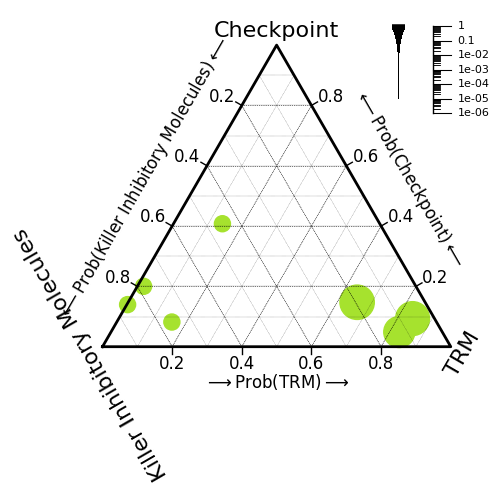

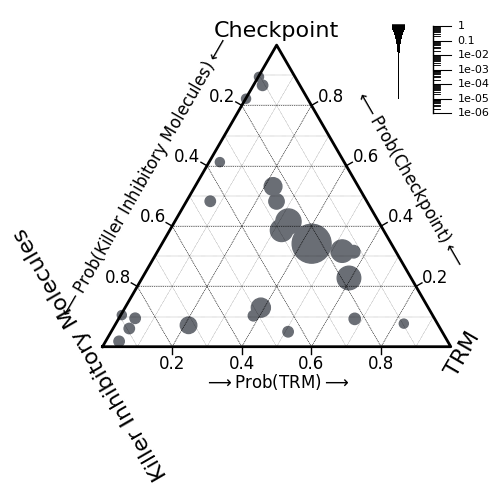

In [187]:
copy = adata.copy()
for x in copy.obs.columns.tolist():
    if "Pseudo" in x:
        del copy.obs[x]

markers = dict()
markers["Checkpoint"] = ["PDCD1","CTLA4","LAG3"]
markers["Killer Inhibitory Molecules"] = ["KLRD1","CD96"]
markers["TRM"] = ["CXCR6"]

copy, dist = phenotype_probability(cembed, copy, markers, method="normalized_exponential", temperature=0.00005, return_distances=True, normalize=True, target_col="mpr_v_nmpr")
tcri.pp.register_phenotype_key(copy,"mpr_v_nmpr")
xdata = copy[copy.obs["specificity_simple"].isin(["MANA"])]
# xdata = xdata[xdata.obs["genevector"] == "TRM"]
# xdata = xdata[xdata.obs["clone_size"] > 1]
tcri.pp.joint_distribution(xdata)
tcri.pl.probability_ternary(xdata,phenotype_names=["Checkpoint","Killer Inhibitory Molecules","TRM"], nt=False, method="probabilistic",
             splitby="response",conditions=["MPR"], top_n=60,color=main_color_map["non-MPR"], scale_function=lambda x :  30*(x**(1/5)),
             save="/Users/ceglian/mpr_response_tern.pdf")
tcri.pl.probability_ternary(xdata,phenotype_names=["Checkpoint","Killer Inhibitory Molecules","TRM"], nt=False, method="probabilistic",
             splitby="response",conditions=["non-MPR"], top_n=60,color=main_color_map["MPR"], scale_function=lambda x :  30*(x**(1/5)),
             save="/Users/ceglian/nmpr_response_tern.pdf")


In [145]:
for x in adata.var.index.tolist():
    if "FASL" in x:
        print(x)

In [181]:
embed.compute_similarities("CXCR6").head(40)

,Gene,Similarity
0,CXCR6,1.000000
1,SAMSN1,0.750096
2,SLA,0.735694
3,CYTIP,0.711813
4,RGS1,0.690501
5,LINC01871,0.683608
6,ETS1,0.682572
7,PTPN22,0.673914
8,CD96,0.673269
9,CD2,0.646504


{'TRM', 'Memory', 'Dysfunctional', 'Activated'}
Activated        0.478597
Dysfunctional    0.516235
Memory           0.519258
TRM              0.437865
dtype: float64
Activated        0.389400
Dysfunctional    0.440610
Memory           0.496530
TRM              0.443068
dtype: float64
Activated        0.652507
Dysfunctional    0.748298
Memory           0.631453
TRM              0.677263
dtype: float64


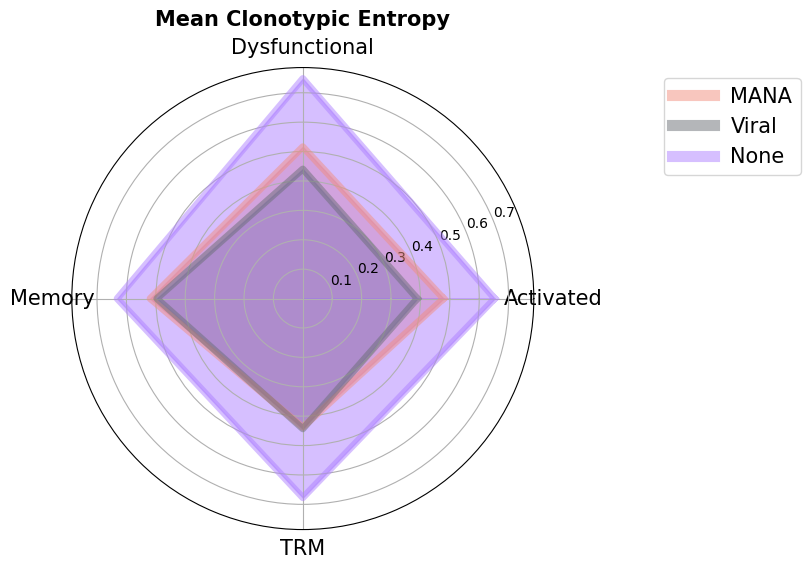

In [69]:
def polar_plot(adata, phenotypes=None, statistic="entropy", method="probabilistic", save=None, figsize=(6,6), title=None, alpha=0.6, fontsize=15, splitby=None, bbox_to_anchor=(1.15,1.), linewidth=5., legend_fontsize=15, color_dict=None):
    tcri.pp.joint_distribution(adata,method=method )
    plt.figure(figsize=figsize)
    ax = plt.subplot(111, projection='polar')
    if splitby is None:
        splits = ['All']
    else:
        splits = list(set(adata.obs[splitby]))
    if phenotypes is None:
        phenotypes = set(adata.obs[adata.uns["tcri_phenotype_key"]])
        print(phenotypes)
    N = len(phenotypes)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    plot_theta = np.append(theta, theta[0])
    adata = adata[adata.obs[adata.uns["tcri_phenotype_key"]].isin(phenotypes)]
    for i, split in enumerate(splits): 
        if color_dict == None:
            colorx = tcri.pl.tcri_colors[i]
        else:
            colorx = color_dict[split]
        psubset = adata[adata.obs[splitby] == split]
        pdists = []
        for p in set(psubset.obs["batch"]):
            ppsubset = psubset[psubset.obs["batch"] == p]
            if len(ppsubset.obs.index) < 10: continue
            tcri.pp.joint_distribution(ppsubset)
            if statistic == "entropy":
                pdist = pd.Series(tcri.tl.clonotypic_entropies(ppsubset,normalized=True))
                phenotypes = pdist.index.tolist()
                pdists.append(pdist)
            else:    
                pdist = pdistribution(psubset, method=method)
            pdists.append(pdist)
        pdist = pd.DataFrame(pdists).T
        pdist = pdist.mean(axis=1)
        print(pdist)
        pdist = pdist.tolist()
        pdist.append(pdist[0])
        ax.plot(plot_theta, pdist, color=colorx, alpha=alpha, label=split, linewidth=linewidth)
        ax.fill_between(plot_theta, 0, pdist, color=colorx, alpha=alpha)
    ax.set_xticks(theta)
    ax.set_xticklabels(phenotypes, fontsize=fontsize)
    ax.grid(True)
    leg = ax.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, fontsize=legend_fontsize)
    for line in leg.get_lines():
        line.set_linewidth(8.0)  # Set the line width
    if title:
        plt.title(title, va='bottom', fontsize=fontsize, fontweight="bold")
    if save:
        plt.savefig(save)

sub = adata[adata.obs["clone_size"] > 0]
sub = sub[sub.obs['genevector']!="Naive/CM"].copy()
tcri.pp.register_phenotype_key(sub,"genevector")
tcri.pp.joint_distribution(sub)
polar_plot(sub, splitby="specificity_simple",statistic="entropy", title="Mean Clonotypic Entropy",save="/Users/ceglian/smith_ent_polar.pdf", alpha=0.5, bbox_to_anchor=(1.6,1))

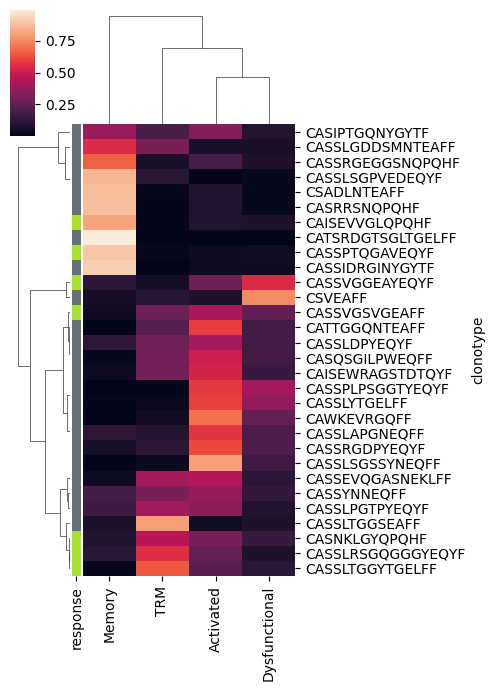

In [243]:
sub = adata[adata.obs["specificity"] == "MANA"]
# nmpr = main_color_map["MPR"]
# main_color_map["MPR"] = main_color_map["non-MPR"]
# main_color_map["non-MPR"] = nmpr
#sub = adata[adata.obs["clone_size"] > 50]
tcri.pp.joint_distribution(sub)
mat = sub.uns["joint_distribution"] / sub.uns["joint_distribution"].sum(axis=0)
mat = mat.T
df = pd.DataFrame(mat)
mapper = dict(zip(adata.obs["trb"],adata.obs["response"]))

rows = []
for x in df.index:
    rows.append(mapper[x])
df["response"] = rows
df = df.sort_values("response")
rows = df.pop("response")
lut = main_color_map
row_colors = rows.map(lut)

g = sns.clustermap(data=df, row_colors=row_colors,figsize=(5,7),metric="correlation",yticklabels=True)

# # Rotate y-axis labels
# plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Set rotation to 0 if preferred

# # Adjust font size for y-axis labels
# plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=5)  # Set a smaller font size if needed

# # Use tight_layout to automatically adjust subplot parameters
# plt.tight_layout()

plt.savefig("/Users/ceglian/mat.pdf")

{'non-MPR': '#6A6E75'}


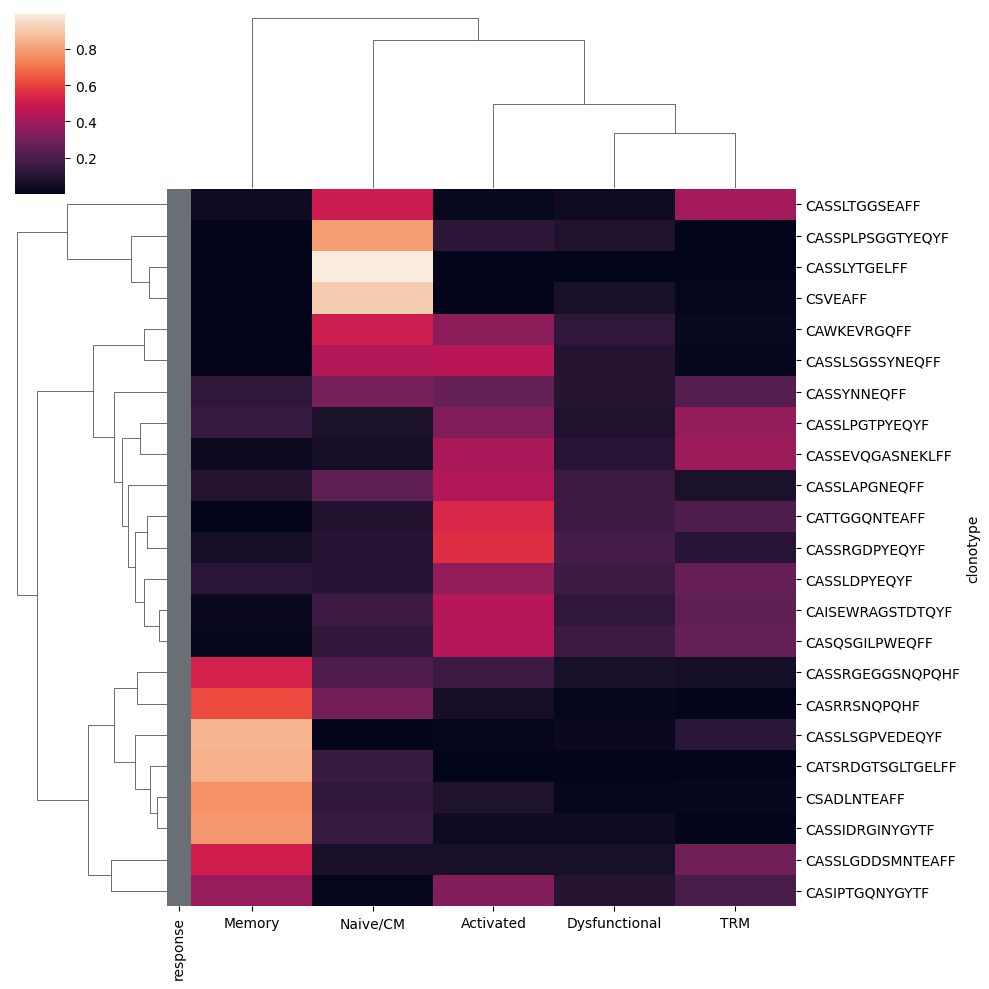

In [73]:
sub = adata[adata.obs["specificity"] == "MANA"]
sub = sub[sub.obs["response"] == "non-MPR"]
#sub = adata[adata.obs["clone_size"] > 50]
tcri.pp.joint_distribution(sub)
mat = sub.uns["joint_distribution"] / sub.uns["joint_distribution"].sum(axis=0)
mat = mat.T
df = pd.DataFrame(mat)
mapper = dict(zip(adata.obs["trb"],adata.obs["response"]))

rows = []
for x in df.index:
    rows.append(mapper[x])
df["response"] = rows
df = df.sort_values("response")
rows = df.pop("response")
lut = dict(zip(rows.unique(), ["#6A6E75","#A6E22E"]))
print(lut)
row_colors = rows.map(lut)

sns.clustermap(data=df, row_colors=row_colors)
plt.savefig("/Users/ceglian/mat.pdf")

In [75]:
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


#sub = adata[adata.obs["clone_size"] > 1]
sub = adata.copy()
tcri.pp.joint_distribution(sub)
mat = sub.uns["joint_distribution"] / sub.uns["joint_distribution"].sum(axis=0)
mat = mat.T

df = pd.DataFrame(mat)
print(df.shape)
# Initialize UMAP. n_neighbors and min_dist are important parameters to tune
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit the model to your data
embedding = reducer.fit_transform(mat)

mapper = dict(zip(adata.obs["trb"],adata.obs["response_specific"]))
rows = []
for x in df.index:
    r = mapper[x]
    if "None" in r:
        rows.append("_None")
    else:
        rows.append(r)
dat = tcri.tl.phenotypic_entropies(adata)
ct = []
for x in df.index:
    ct.append(dat[x])
df["entropy"] = ct
df["response_specific"] = rows


df["x"] =  embedding[:, 0]
df["y"] =  embedding[:, 1]

(46234, 5)


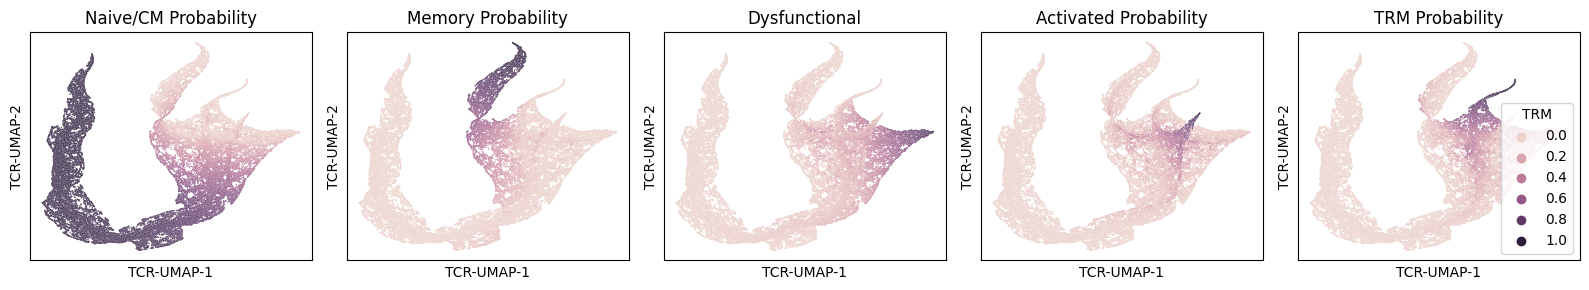

In [81]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,5,figsize=(16, 3))
sns.scatterplot(data=df, x="x", y="y",alpha=0.9,hue="Naive/CM",ax=ax[0],legend=None,s=1)
ax[0].set_title("Naive/CM Probability")
sns.scatterplot(data=df, x="x", y="y",alpha=0.9,hue="Memory",ax=ax[1],legend=None,s=1)
ax[1].set_title("Memory Probability")
sns.scatterplot(data=df, x="x", y="y",alpha=0.9,hue="Dysfunctional",ax=ax[2],legend=None,s=1)
ax[2].set_title("Dysfunctional")
sns.scatterplot(data=df, x="x", y="y",alpha=0.9,hue="Activated",ax=ax[3],legend=None,s=1)
ax[3].set_title("Activated Probability")
sns.scatterplot(data=df, x="x", y="y",alpha=0.9,hue="TRM",ax=ax[4],s=1)
ax[4].set_title("TRM Probability")



for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel('TCR-UMAP-1')
    axis.set_ylabel('TCR-UMAP-2')

fig.tight_layout()
fig.savefig("/Users/ceglian/clonemap.pdf")

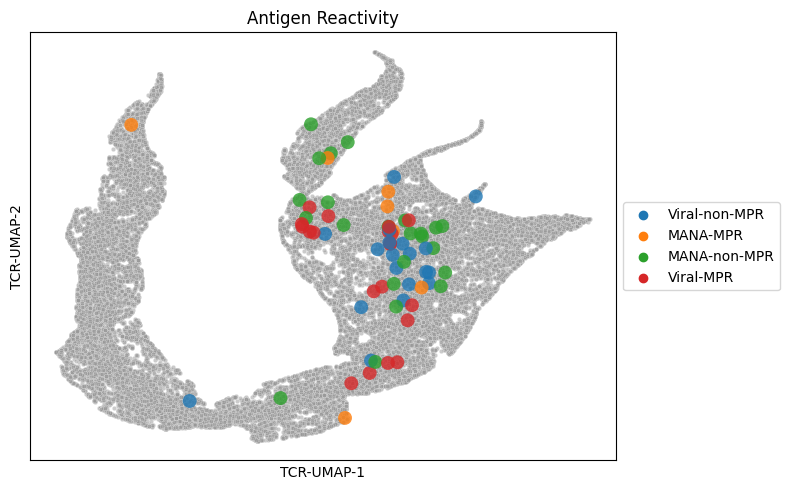

In [97]:
fig, ax=plt.subplots(1,1,figsize=(8, 5))
sns.scatterplot(data=df, x="x", y="y",alpha=0.5,color="#999999",ax=ax,s=10)
scatter = sns.scatterplot(data=df[df["response_specific"]!="_None"], x="x", y="y", hue="response_specific",s=100,ax=ax,alpha=0.8,linewidth=0,palette="tab10")
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Antigen Reactivity")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('TCR-UMAP-1')
ax.set_ylabel('TCR-UMAP-2')
fig.tight_layout()
fig.savefig("/Users/ceglian/ar.pdf")

In [285]:
mapper = dict(zip(dx.index,dx["conga_score"]))
#sub = adata[adata.obs["specificity"] == "MANA"]
sub = adata[adata.obs["trb"].isin(dx.index.tolist())]
print(sub)
#sub = adata[adata.obs["clone_size"] > 50]
tcri.pp.joint_distribution(sub)
mat = sub.uns["joint_distribution"] / sub.uns["joint_distribution"].sum(axis=0)
mat = mat.T
df = pd.DataFrame(mat)


rows = []
for x in df.index:
    rows.append(mapper[x])
df["response"] = rows
rows = df.pop("response")
lut = dict(zip(rows.unique(), tcri.pl.tcri_colors))
print(lut)
row_colors = rows.map(lut)
row_colors

View of AnnData object with n_obs × n_vars = 1364 × 456
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CTgene', 'CTnt', 'CTaa', 'CTstrict', 'sample', 'barcode', 'Frequency', 'cloneType', 'mito.genes', 'db.class', 'db.score', 'PT.annot', 'PT.score', 'HPCA.labels', 'HPCA.pruned.labels', 'Monaco.labels', 'Monaco.pruned.labels', 'db.weight.score', 'db.ratio', 'HPCA.first.labels', 'functional.cluster', 'functional.cluster.conf', 'ID', 'T.filter', 'Tissue', 'GEO_RNA', 'Cohort', 'Sample', 'Treatments', 'Response', 'T', 'SampleID', 'batch', 'trb', 'specificity', 'response_specific', 'clone_size', 'UMAP1', 'UMAP2', 'log(Clone Size)', 'genevector', 'Naive/CM Pseudo-probability', 'Activated Pseudo-probability', 'Memory Pseudo-probability', 'Dysfunctional Pseudo-probability', 'TRM Pseudo-probability', 'Naive/CM Module Score', 'Activated Module Score', 'Memory Module Score', 'Dysfunctional Module Score', 'TRM Module Score', 'response'
    var: 'features', 'entropy-BCT1.3', 'entropy-BCT1.5', 

clonotype
CACTGTTYTYEQYF      #F28E7F
CAISEWRAGSTDTQYF    #6A6E75
CALVGGYEQYF         #F28E7F
CASDRGLAGYEQFF      #AE81FF
CASFGGSYNEQFF       #AE81FF
                     ...   
CAWSRGRADEQFF       #F28E7F
CAWTDRSSYEQYF       #F28E7F
CAWTPPEGYEQYF       #F28E7F
CAWTSGGYEQYF        #F28E7F
CAWTSGSRYEQYF       #F28E7F
Name: response, Length: 67, dtype: object

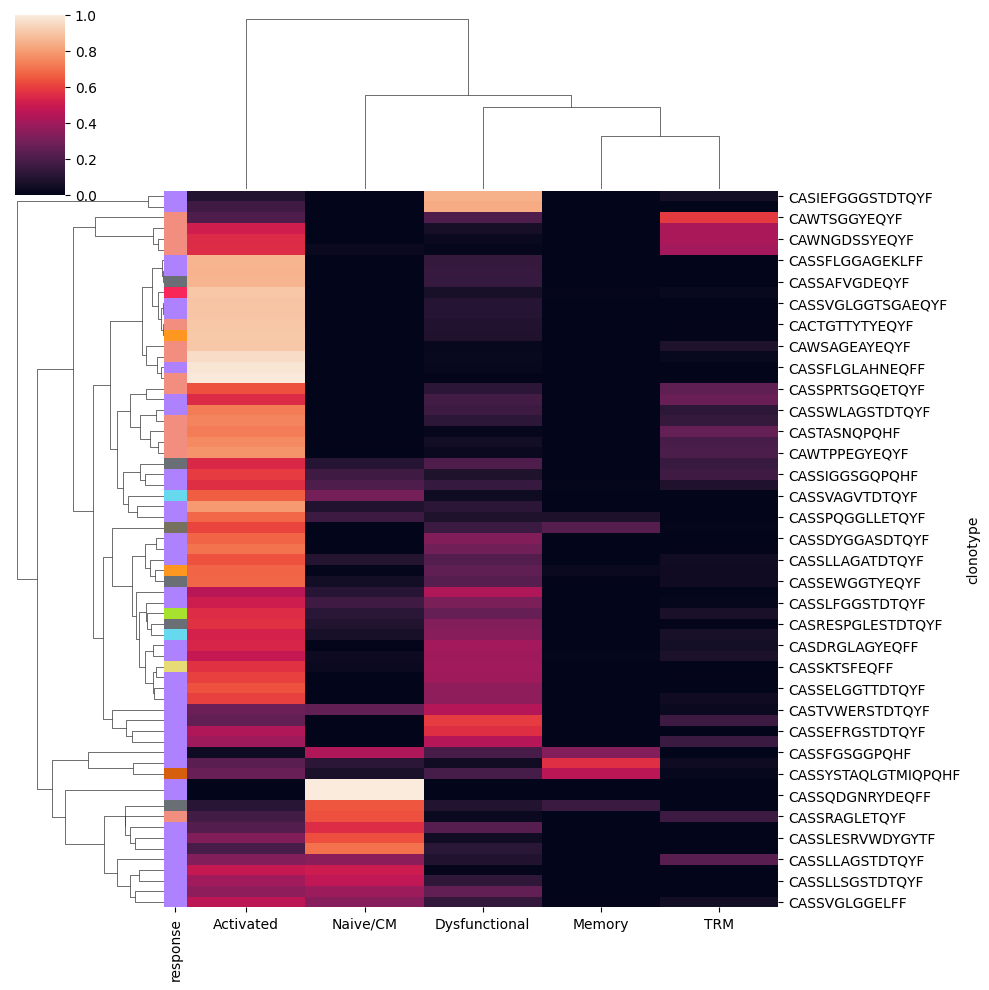

In [286]:
sns.clustermap(data=df, row_colors=row_colors)

In [38]:
for x,y in cembed.get_predictive_genes(cembed, adata,"response_specificity").items():
    print(x, y)

NameError: name 'cembed' is not defined